In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gudhi as gd
from gudhi.representations import PersistenceImage, BettiCurve, Entropy

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score

from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde

from pathlib import Path
from tqdm.notebook import tqdm

In [2]:
data_input = Path('data_segmented')
input_airyscan = data_input / 'Airyscan'
input_sted = data_input / 'STED'

data_pers = Path('data_processed')
pers_sted = data_pers / 'persistence_sted'
pers_airyscan = data_pers / 'persistence_airyscan'
vectorization_sted = data_pers / 'vectorizations_sted'
vectorization_airyscan = data_pers / 'vectorizations_airyscan'
classification_path = data_pers / 'classification'

figures_path = Path('figures_plots')

<Axes: xlabel='type', ylabel='accuracy_balanced'>

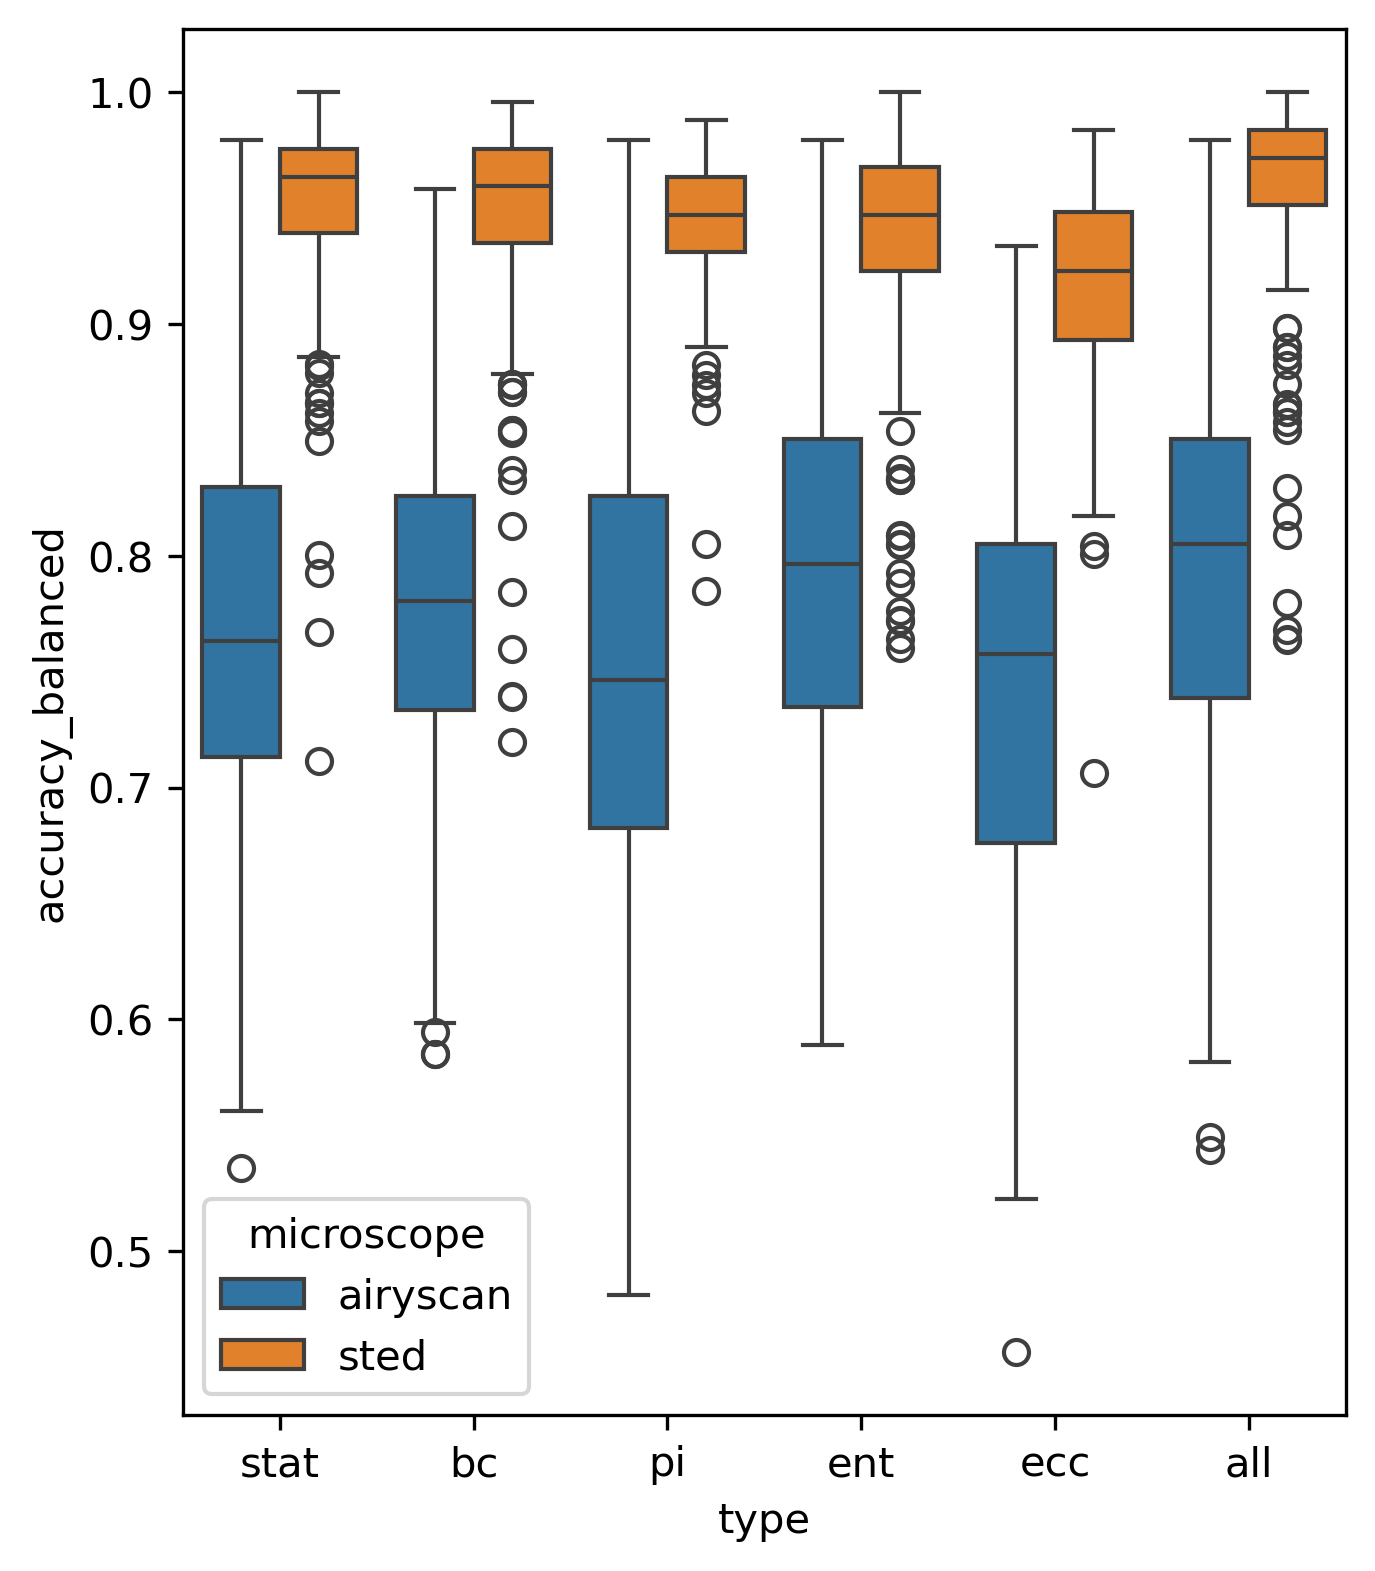

In [3]:
df = pd.read_csv('error_classification_test.csv')

fig, ax = plt.subplots(figsize=(5, 6), dpi=300)
sns.boxplot(data=df, x='type', y='accuracy_balanced', hue='microscope', ax=ax)

In [26]:
preproc_choice = 'clip_minmax_gaussian2c_minmax'

class_files = sorted([file for file in classification_path.glob('*classification*traintest_runs*.csv')
                      if preproc_choice in file.name and 'sted' in file.name.lower()
                      ])
df_class_sted = pd.concat([pd.read_csv(file) for file in tqdm(class_files)])
df_class_sted = df_class_sted.sort_values(by=['dim', 'type', 'run'])

class_files = sorted([file for file in classification_path.glob('*classification*traintest_runs*.csv')
                      if preproc_choice in file.name and 'airyscan' in file.name.lower()
                      ])
df_class_airy = pd.concat([pd.read_csv(file) for file in tqdm(class_files)])
df_class_airy = df_class_airy.sort_values(by=['dim', 'type', 'run'])

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
df_class_sted.drop(columns=['hash_train', 'hash_test', 'prefix']).groupby(['dim', 'type'])\
    .agg(['mean', 'std']).reset_index()

dim  type accuracy_balanced           accuracy_train           precision  \
                          mean       std           mean       std      mean   
0    2   all          0.980834  0.010978       0.999116  0.002299  0.983545   
1    2    bc          0.979976  0.012202       0.998878  0.001812  0.982582   
2    2   ecc          0.928499  0.022207       0.984014  0.018259  0.935142   
3    2   ent          0.976251  0.014994       0.999184  0.001880  0.979556   
4    2    pi          0.958005  0.015842       0.999694  0.000978  0.966646   
5    2  stat          0.977504  0.016492       0.994966  0.006200  0.980438   
6    3   all          0.978239  0.014182       0.998265  0.003503  0.981269   
7    3    bc          0.968870  0.013053       0.999082  0.001985  0.972946   
8    3   ecc          0.955442  0.017113       0.986769  0.013353  0.960843   
9    3   ent          0.975057  0.015136       0.999082  0.004557  0.977871   
10   3    pi          0.951820  0.019211       0.972551  0.013888  0.960506   
11   3  stat          0.970127  0.016695       0.989116  0.008233  0.972534   

                recall             run             
         std      mean       std  mean        std  
0   0.008503  0.983315  0.008611  49.5  29.011492  
1   0.010019  0.982283  0.010266  49.5  29.011492  
2   0.019278  0.933533  0.020348  49.5  29.011492  
3   0.011634  0.979130  0.011985  49.5  29.011492  
4   0.012898  0.966033  0.013163  49.5  29.011492  
5   0.014124  0.980109  0.014415  49.5  29.011492  
6   0.012543  0.980978  0.012798  49.5  29.011492  
7   0.011630  0.972446  0.011848  49.5  29.011492  
8   0.013926  0.960109  0.014373  49.5  29.011492  
9   0.013319  0.977337  0.013841  49.5  29.011492  
10  0.017207  0.959620  0.017871  49.5  29.011492  
11  0.014337  0.971957  0.014873  49.5  29.011492

In [30]:
df_class_airy.drop(columns=['hash_train', 'hash_test', 'prefix']).groupby(['dim', 'type'])\
    .agg(['mean', 'std']).reset_index()

dim  type accuracy_balanced           accuracy_train           precision  \
                          mean       std           mean       std      mean   
0    2   all          0.753731  0.086168       0.991964  0.025930  0.785724   
1    2    bc          0.744583  0.083364       0.977321  0.050562  0.778112   
2    2   ecc          0.664754  0.074495       0.966429  0.073617  0.713089   
3    2   ent          0.742860  0.083373       0.972321  0.053262  0.779665   
4    2    pi          0.719867  0.077431       0.985179  0.041165  0.759396   
5    2  stat          0.721780  0.061426       0.989464  0.027582  0.760999   
6    3   all          0.900114  0.058462       0.999286  0.003517  0.910208   
7    3    bc          0.869564  0.079342       0.990179  0.017835  0.886982   
8    3   ecc          0.810322  0.068614       0.970536  0.044426  0.833333   
9    3   ent          0.850777  0.061832       0.989107  0.026118  0.868721   
10   3    pi          0.826780  0.084536       0.999286  0.004337  0.847766   
11   3  stat          0.911951  0.051136       0.996429  0.007614  0.919079   

                recall             run             
         std      mean       std  mean        std  
0   0.072860  0.749714  0.073785  49.5  29.011492  
1   0.070524  0.746286  0.073129  49.5  29.011492  
2   0.063856  0.678000  0.072173  49.5  29.011492  
3   0.067215  0.757429  0.072246  49.5  29.011492  
4   0.066222  0.704286  0.069675  49.5  29.011492  
5   0.052687  0.721429  0.070733  49.5  29.011492  
6   0.048199  0.899143  0.054552  49.5  29.011492  
7   0.065561  0.871429  0.079215  49.5  29.011492  
8   0.055991  0.805714  0.068557  49.5  29.011492  
9   0.051640  0.846000  0.065215  49.5  29.011492  
10  0.069802  0.828286  0.077849  49.5  29.011492  
11  0.042960  0.908286  0.047757  49.5  29.011492

In [66]:
df_class_airy.drop(columns=['hash_train', 'hash_test', 'prefix']).groupby(['dim', 'type'])\
    .median().reset_index()

dim  type  accuracy_balanced  accuracy_train  precision    recall   run
0     2   all           0.754735        1.000000   0.787967  0.742857  49.5
1     2    bc           0.755682        1.000000   0.787967  0.742857  49.5
2     2   ecc           0.668561        1.000000   0.719328  0.685714  49.5
3     2   ent           0.749053        1.000000   0.785614  0.771429  49.5
4     2    pi           0.723485        1.000000   0.766282  0.714286  49.5
5     2  stat           0.721591        1.000000   0.762777  0.714286  49.5
6     3   all           0.912879        1.000000   0.917805  0.914286  49.5
7     3    bc           0.875000        1.000000   0.896304  0.885714  49.5
8     3   ecc           0.806818        0.991071   0.831127  0.828571  49.5
9     3   ent           0.854167        1.000000   0.877551  0.857143  49.5
10    3    pi           0.825758        1.000000   0.846053  0.828571  49.5
11    3  stat           0.916667        1.000000   0.917805  0.914286  49.5

In [67]:
df_class_sted.drop(columns=['hash_train', 'hash_test', 'prefix']).groupby(['dim', 'type'])\
    .median().reset_index()

dim  type  accuracy_balanced  accuracy_train  precision    recall   run
0     2   all           0.983739        1.000000   0.983823  0.983696  49.5
1     2    bc           0.983673        1.000000   0.983823  0.983696  49.5
2     2   ecc           0.929006        0.996599   0.937468  0.934783  49.5
3     2   ent           0.979773        1.000000   0.983695  0.983696  49.5
4     2    pi           0.957430        1.000000   0.967391  0.967391  49.5
5     2  stat           0.979773        0.996599   0.983695  0.983696  49.5
6     3   all           0.979773        1.000000   0.983695  0.983696  49.5
7     3    bc           0.969593        1.000000   0.973071  0.972826  49.5
8     3   ecc           0.959347        0.993197   0.962850  0.961957  49.5
9     3   ent           0.975806        1.000000   0.978815  0.978261  49.5
10    3    pi           0.955447        0.969388   0.964021  0.961957  49.5
11    3  stat           0.975476        0.989796   0.973692  0.972826  49.5

# Classification: plots in the paper

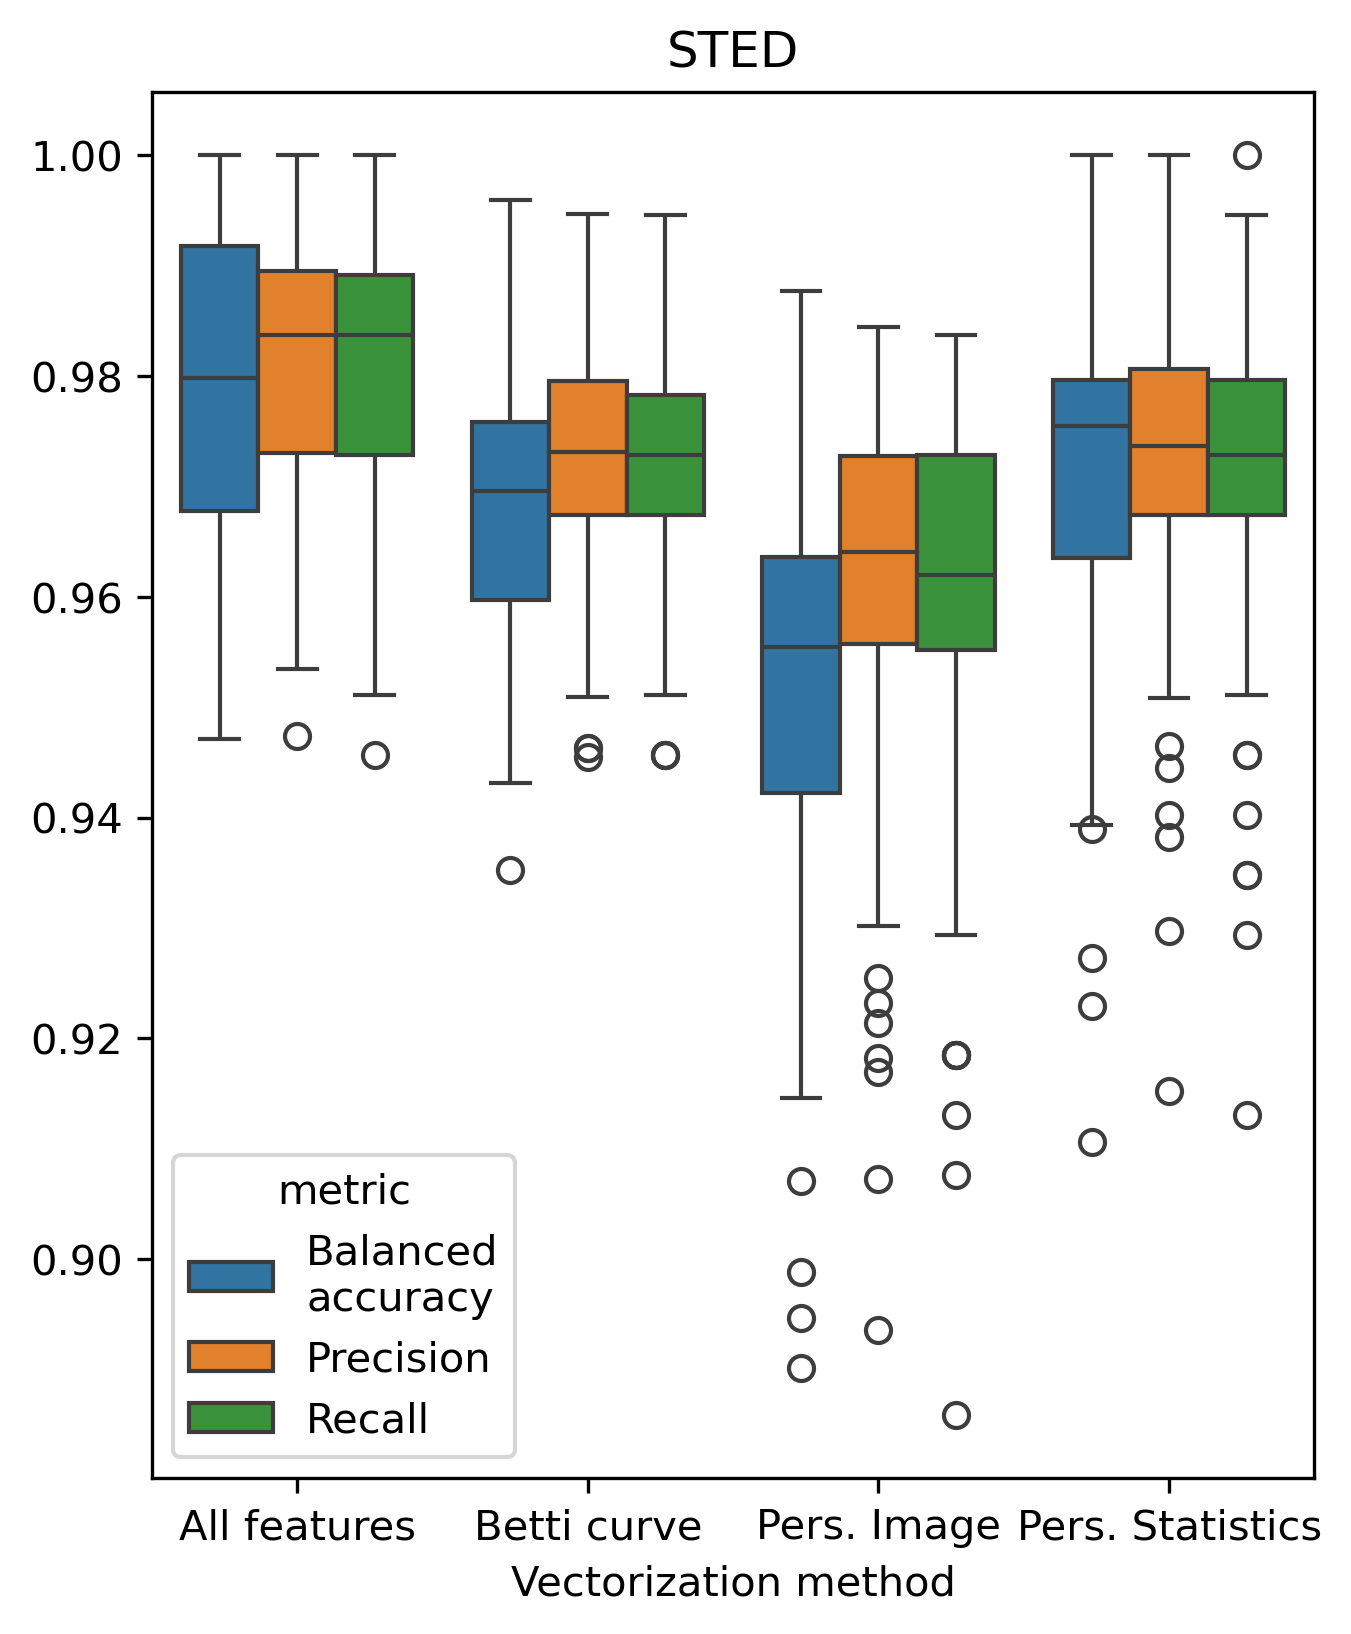

In [44]:
# pick the best perfomer except stat or all

df_plot = df_class_sted.loc[(df_class_sted['dim'] == 3), :].copy()
df_plot = df_plot.drop(columns=['dim', 'prefix', 'hash_train', 'hash_test', 'run', 'accuracy_train'])
df_melt = df_plot.melt(id_vars=['type'], var_name='metric', value_name='value')

df_plot = df_melt.loc[(df_melt['type'] == 'bc') | (df_melt['type'] == 'stat') | (df_melt['type'] == 'pi') | (df_melt['type'] == 'all'), :].copy()
df_plot.loc[:, 'type'] = df_plot['type'].replace({'bc': 'Betti curve', 'stat': 'Pers. Statistics', 'pi': 'Pers. Image', 'all': 'All features'})
df_plot.loc[:, 'metric'] = df_plot['metric'].replace({'accuracy_balanced': 'Balanced\naccuracy',
                             'precision': 'Precision',
                             'recall': 'Recall'})

df_plot_sted = df_plot.copy()
fig, ax = plt.subplots(figsize=(5, 6), dpi=300)
sns.boxplot(data=df_plot, x='type', y='value', hue='metric', ax=ax)
ax.set_xlabel('Vectorization method')
ax.set_ylabel('')
ax.set_title('STED')
fig.savefig(figures_path / 'sted_vectorization_performance_splitintometrics.png', dpi=300)

df_choice = df_melt.loc[df_melt['type']=='bc',:]
df_choice.loc[:, 'metric'] = df_choice['metric'].replace({'accuracy_balanced': 'Balanced\naccuracy',
                             'precision': 'Precision',
                             'recall': 'Recall'})

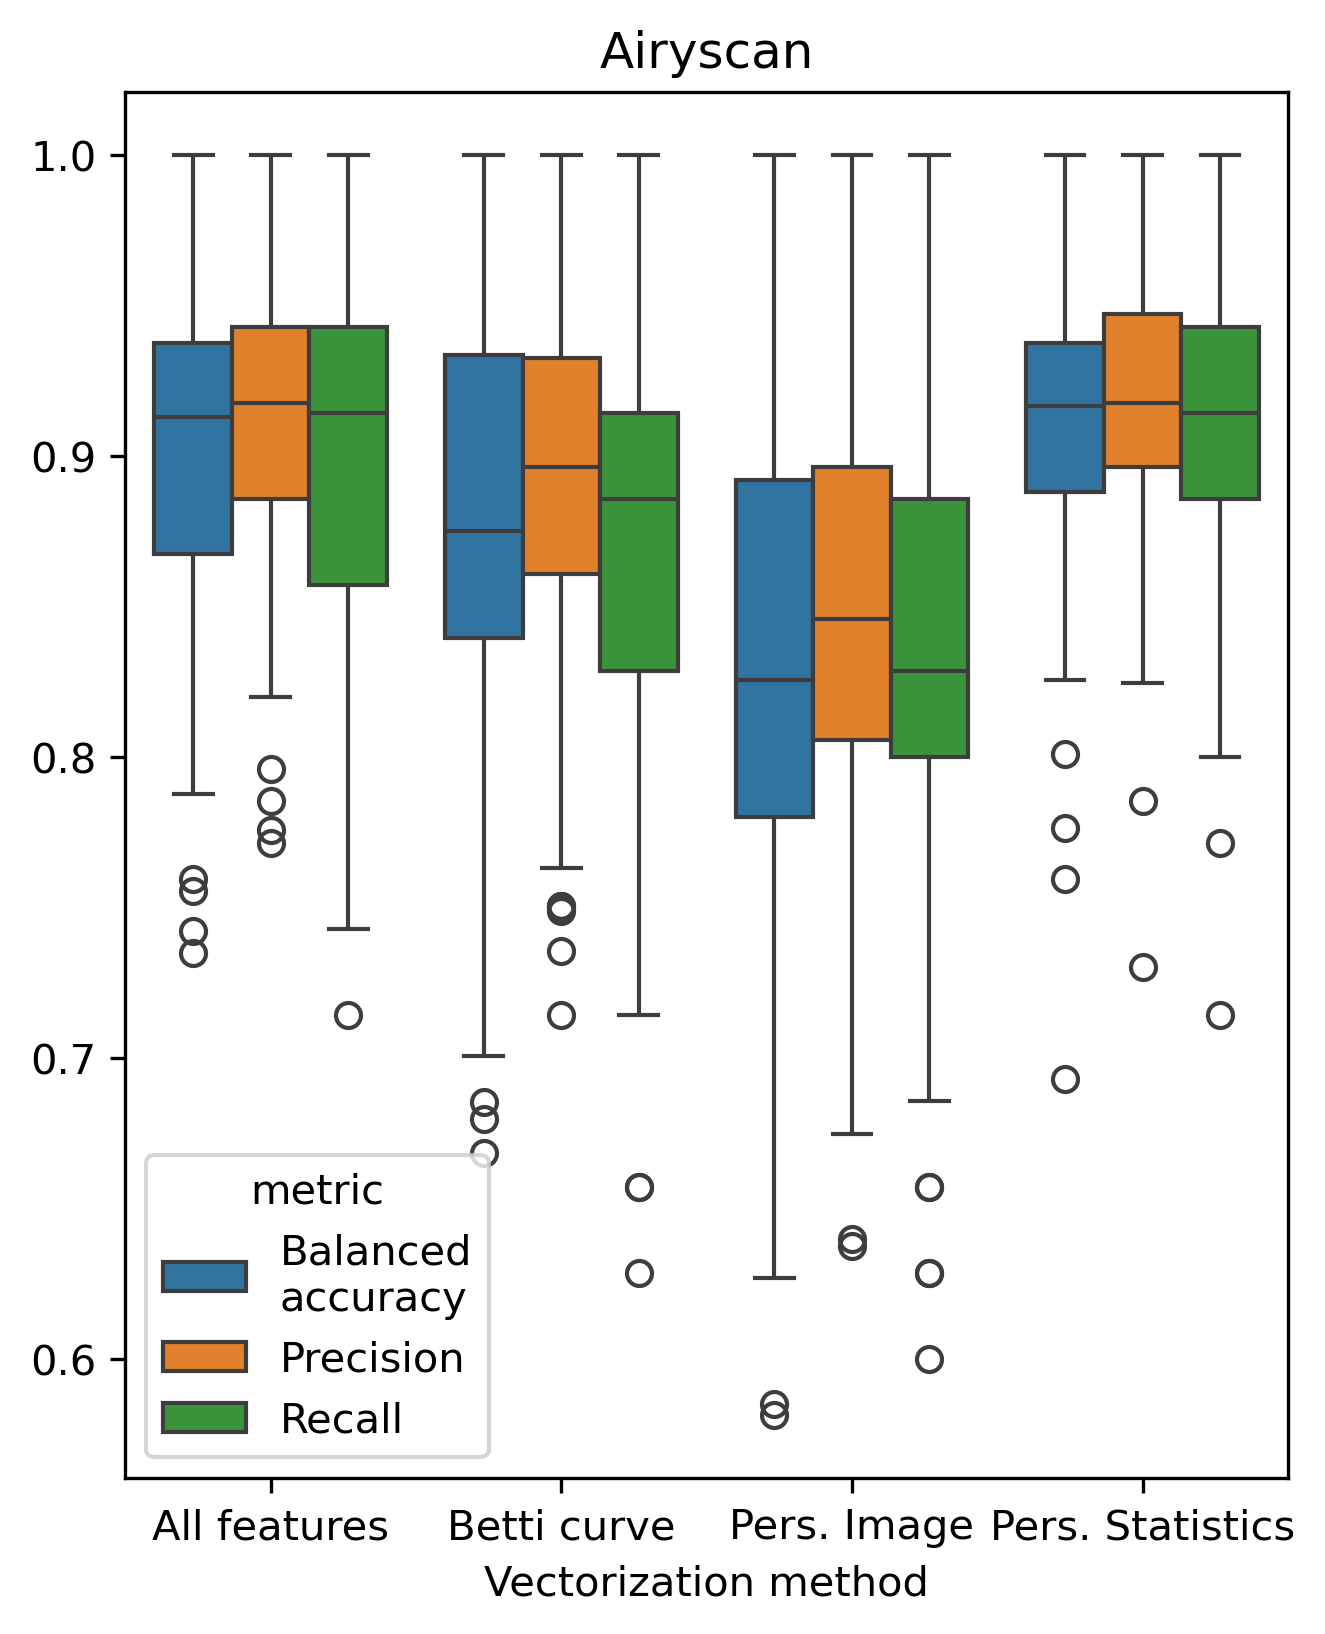

In [43]:
# pick the best perfomer except stat or all

df_plot = df_class_airy.loc[(df_class_airy['dim'] == 3), :].copy()
df_plot = df_plot.drop(columns=['dim', 'prefix', 'hash_train', 'hash_test', 'run', 'accuracy_train'])
df_melt = df_plot.melt(id_vars=['type'], var_name='metric', value_name='value')

df_plot = df_melt.loc[(df_melt['type'] == 'bc') | (df_melt['type'] == 'stat') | (df_melt['type'] == 'pi') | (df_melt['type'] == 'all'), :].copy()
df_plot.loc[:, 'type'] = df_plot['type'].replace({'bc': 'Betti curve', 'stat': 'Pers. Statistics', 'pi': 'Pers. Image', 'all': 'All features'})
df_plot.loc[:, 'metric'] = df_plot['metric'].replace({'accuracy_balanced': 'Balanced\naccuracy',
                             'precision': 'Precision',
                             'recall': 'Recall'})

df_plot_airy = df_plot.copy()
fig, ax = plt.subplots(figsize=(5, 6), dpi=300)
sns.boxplot(data=df_plot, x='type', y='value', hue='metric', ax=ax)
ax.set_xlabel('Vectorization method')
ax.set_ylabel('')
ax.set_title('Airyscan')

df_choice2 = df_melt.loc[df_melt['type']=='bc',:]
df_choice2.loc[:, 'metric'] = df_choice2['metric'].replace({'accuracy_balanced': 'Balanced\naccuracy',
                             'precision': 'Precision',
                             'recall': 'Recall'})
fig.savefig(figures_path / 'airyscan_vectorization_performance_splitintometrics.png', dpi=300)

[Text(0, 0, 'All features'), Text(1, 0, 'Betti curve'), Text(2, 0, 'Pers. Image'), Text(3, 0, 'Pers. Statistics')]


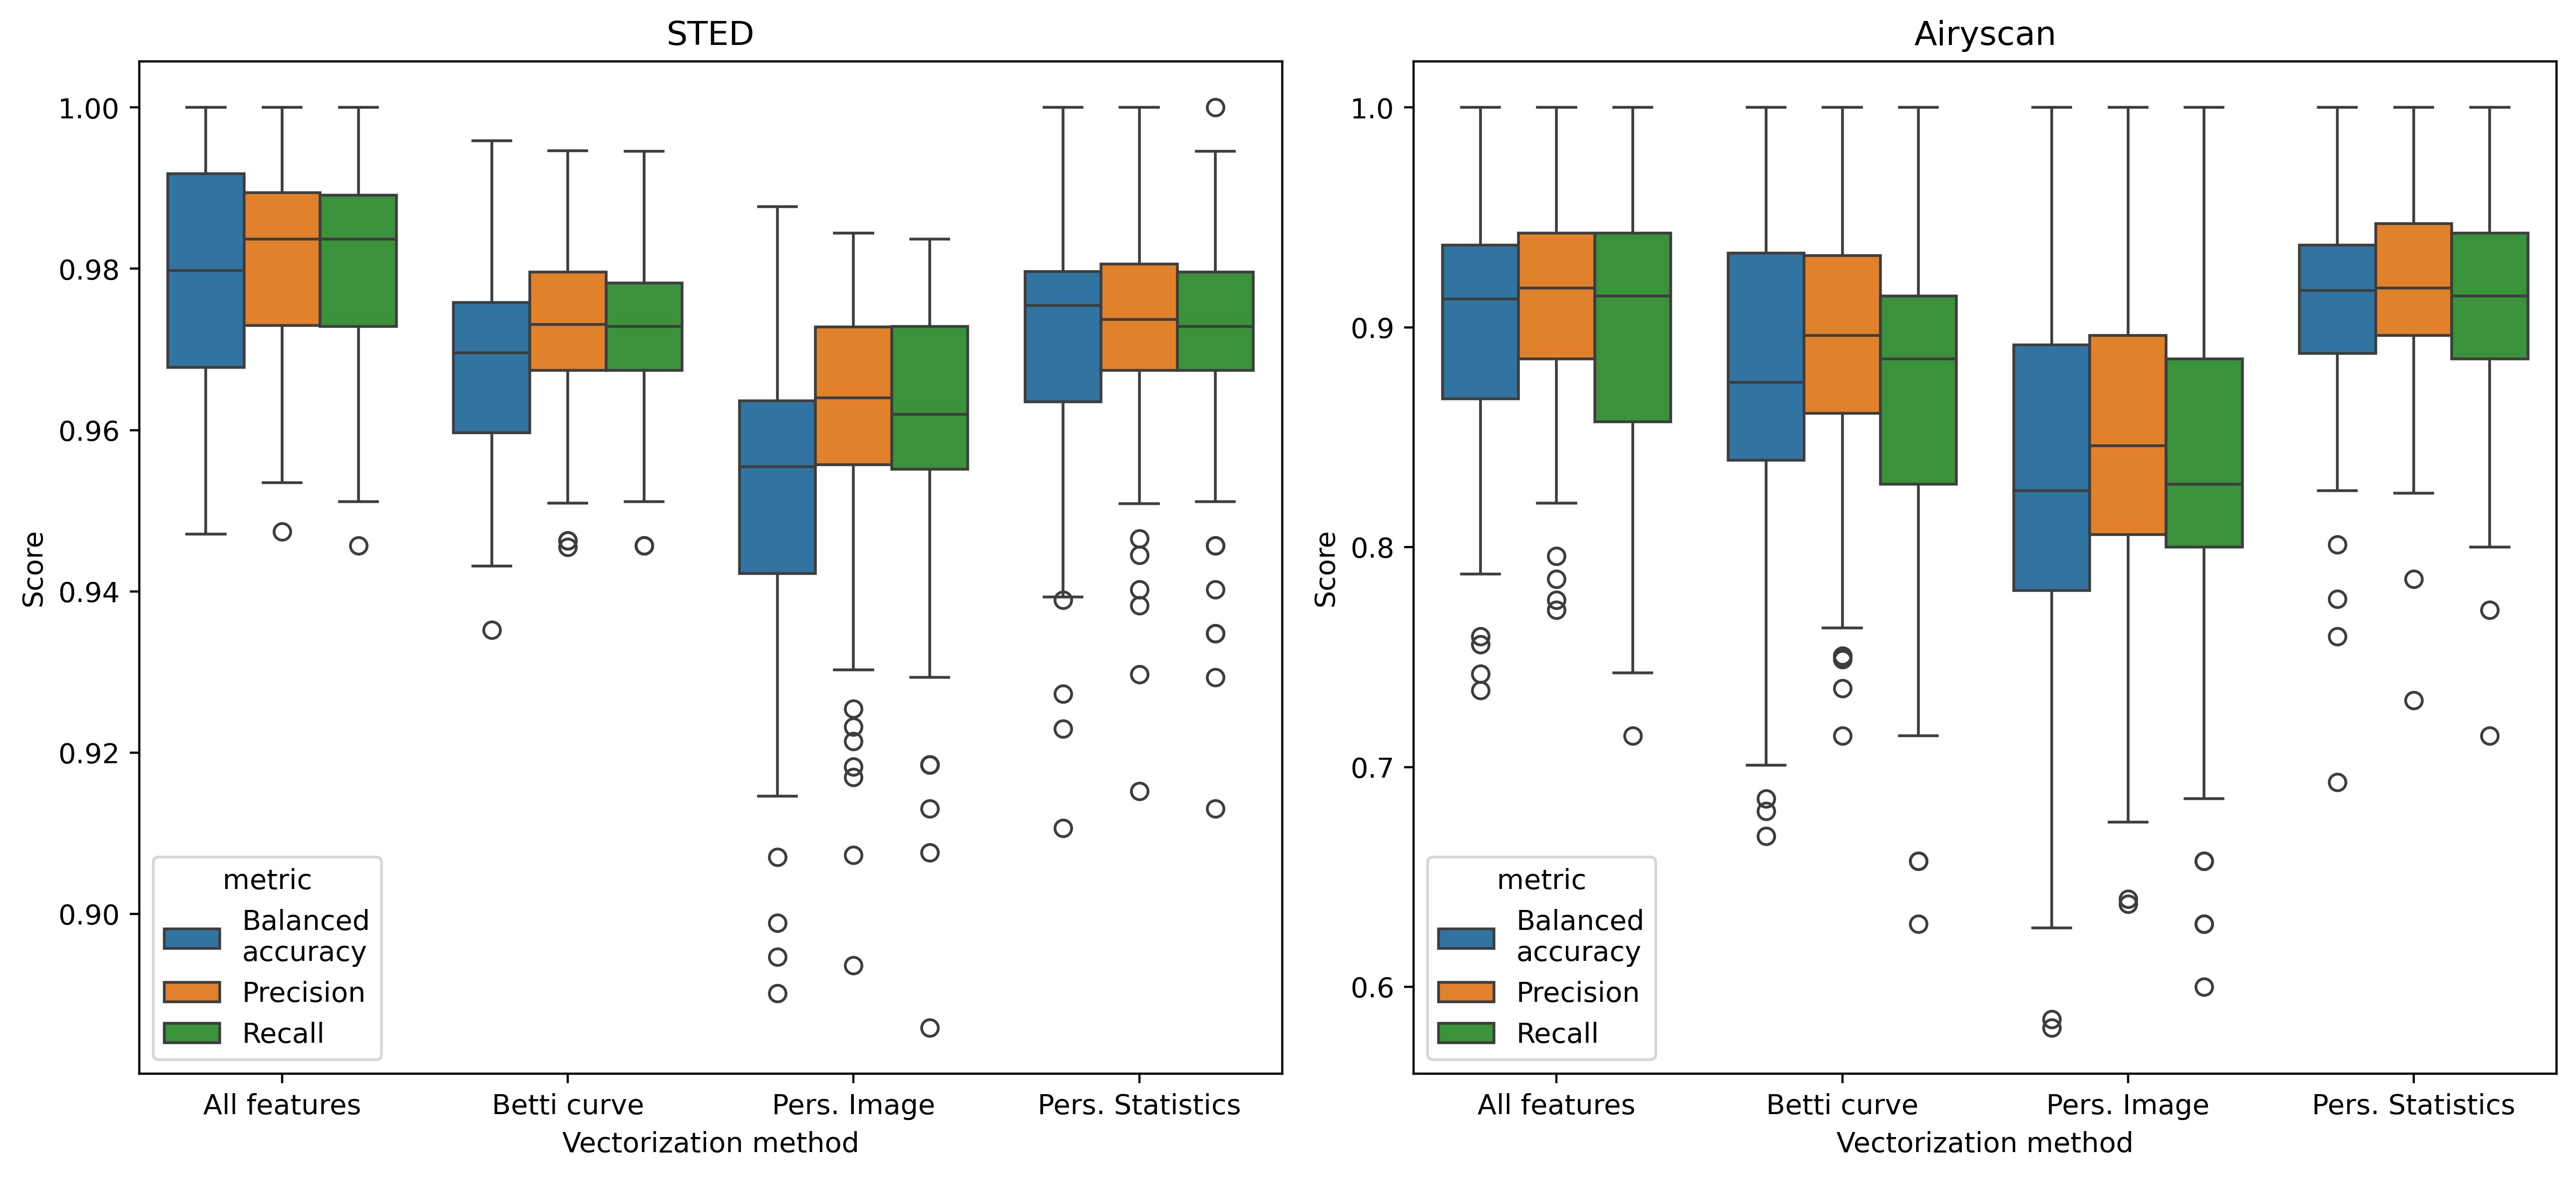

In [47]:
hue_order = ['Balanced\naccuracy', 'Precision', 'Recall']

fig, ax = plt.subplots(1, 2, figsize=(13, 6), dpi=400)
sns.boxplot(data=df_plot_sted, x='type', y='value', hue='metric', ax=ax[0],
    hue_order=hue_order)
ax[0].set_xlabel('Vectorization method')
ax[0].set_ylabel('Score')
ax[0].set_title('STED')

sns.boxplot(data=df_plot_airy, x='type', y='value', hue='metric', ax=ax[1],
    hue_order=hue_order)
ax[1].set_xlabel('Vectorization method')
ax[1].set_ylabel('Score')
ax[1].set_title('Airyscan')

print(ax[1].get_xticklabels())
# print(ax[1].)

fig.tight_layout()
fig.savefig(figures_path / 'airyscan-sted_vectorization_performance_splitintometrics.png', dpi=300)
fig.savefig(figures_path / 'airyscan-sted_vectorization_performance_splitintometrics.pdf', dpi=400, bbox_inches='tight')

### combine both 3d with x for 2d

In [48]:
from scipy.spatial.distance import pdist, squareform, cdist

def get_2d_medians_positions(ax, dftmp, hue_order):
    xnames = [x.get_text() for x in ax.get_xticklabels()]
    positions = []
    for patch in ax.patches:
        bbox = patch.get_path().get_extents()
        if bbox.ymax - bbox.ymin < 1:  # You can adjust this threshold as needed
            x = bbox.xmin + (bbox.xmax - bbox.xmin) / 2
            positions.append(x)
    positions = sorted(positions)
    xpos = [(x.get_position()[0], x.get_text()) for x in ax.get_xticklabels()]
    idx = np.argmin(cdist(np.array([x[0] for x in xpos]).reshape(-1,1),
        np.array(positions).reshape(-1,1)), axis=0)
    return np.array([
        [positions[xi*3 + i],
        dftmp.loc[(dftmp['type'] == xnames[xp])
        & (dftmp['metric'] == hue), 'median'].values[0]]
        for i, hue in enumerate(hue_order)
        for xi, xp in enumerate(np.unique(idx))
        ])

In [ ]:
# pick the best perfomer except stat or all

df_plot = df_class_airy.loc[(df_class_airy['dim'] == 2), :].copy()
df_plot = df_plot.drop(columns=['dim', 'prefix', 'hash_train', 'hash_test', 'run', 'accuracy_train'])
df_melt = df_plot.melt(id_vars=['type'], var_name='metric', value_name='value')

df_plot = df_melt.loc[(df_melt['type'] == 'bc') | (df_melt['type'] == 'stat') | (df_melt['type'] == 'pi') | (df_melt['type'] == 'all'), :].copy()
df_plot.loc[:, 'type'] = df_plot['type'].replace({'bc': 'Betti curve', 'stat': 'Pers. Statistics', 'pi': 'Pers. Image', 'all': 'All features'})
df_plot.loc[:, 'metric'] = df_plot['metric'].replace({'accuracy_balanced': 'Balanced\naccuracy',
                             'precision': 'Precision',
                             'recall': 'Recall'})

df_plot_airy2d = df_plot.copy()

# pick the best perfomer except stat or all

df_plot = df_class_sted.loc[(df_class_sted['dim'] == 2), :].copy()
df_plot = df_plot.drop(columns=['dim', 'prefix', 'hash_train', 'hash_test', 'run', 'accuracy_train'])
df_melt = df_plot.melt(id_vars=['type'], var_name='metric', value_name='value')

df_plot = df_melt.loc[(df_melt['type'] == 'bc') | (df_melt['type'] == 'stat') | (df_melt['type'] == 'pi') | (df_melt['type'] == 'all'), :].copy()
df_plot.loc[:, 'type'] = df_plot['type'].replace({'bc': 'Betti curve', 'stat': 'Pers. Statistics', 'pi': 'Pers. Image', 'all': 'All features'})
df_plot.loc[:, 'metric'] = df_plot['metric'].replace({'accuracy_balanced': 'Balanced\naccuracy',
                             'precision': 'Precision',
                             'recall': 'Recall'})

df_plot_sted2d = df_plot.copy()

## 
df_plot_airy2 = df_plot_airy2d.groupby(['type', 'metric']).agg(['median']).reset_index()
df_plot_sted2 = df_plot_sted2d.groupby(['type', 'metric']).agg(['median']).reset_index()

df_plot_airy2.columns = [x[0] if x[1]=='' else x[1] for x in df_plot_airy2.columns ]
df_plot_sted2.columns = [x[0] if x[1]=='' else x[1] for x in df_plot_sted2.columns ]
## 


# valuepos = get_2d_medians_positions(ax[0], df_plot_sted2, hue_order)
# ax[0].scatter(valuepos[:,0], valuepos[:,1], color='black', marker='x', s=100, zorder=10)

# valuepos = get_2d_medians_positions(ax[1], df_plot_airy2, hue_order)
# ax[1].scatter(valuepos[:,0], valuepos[:,1], color='black', marker='x', s=100, zorder=10)

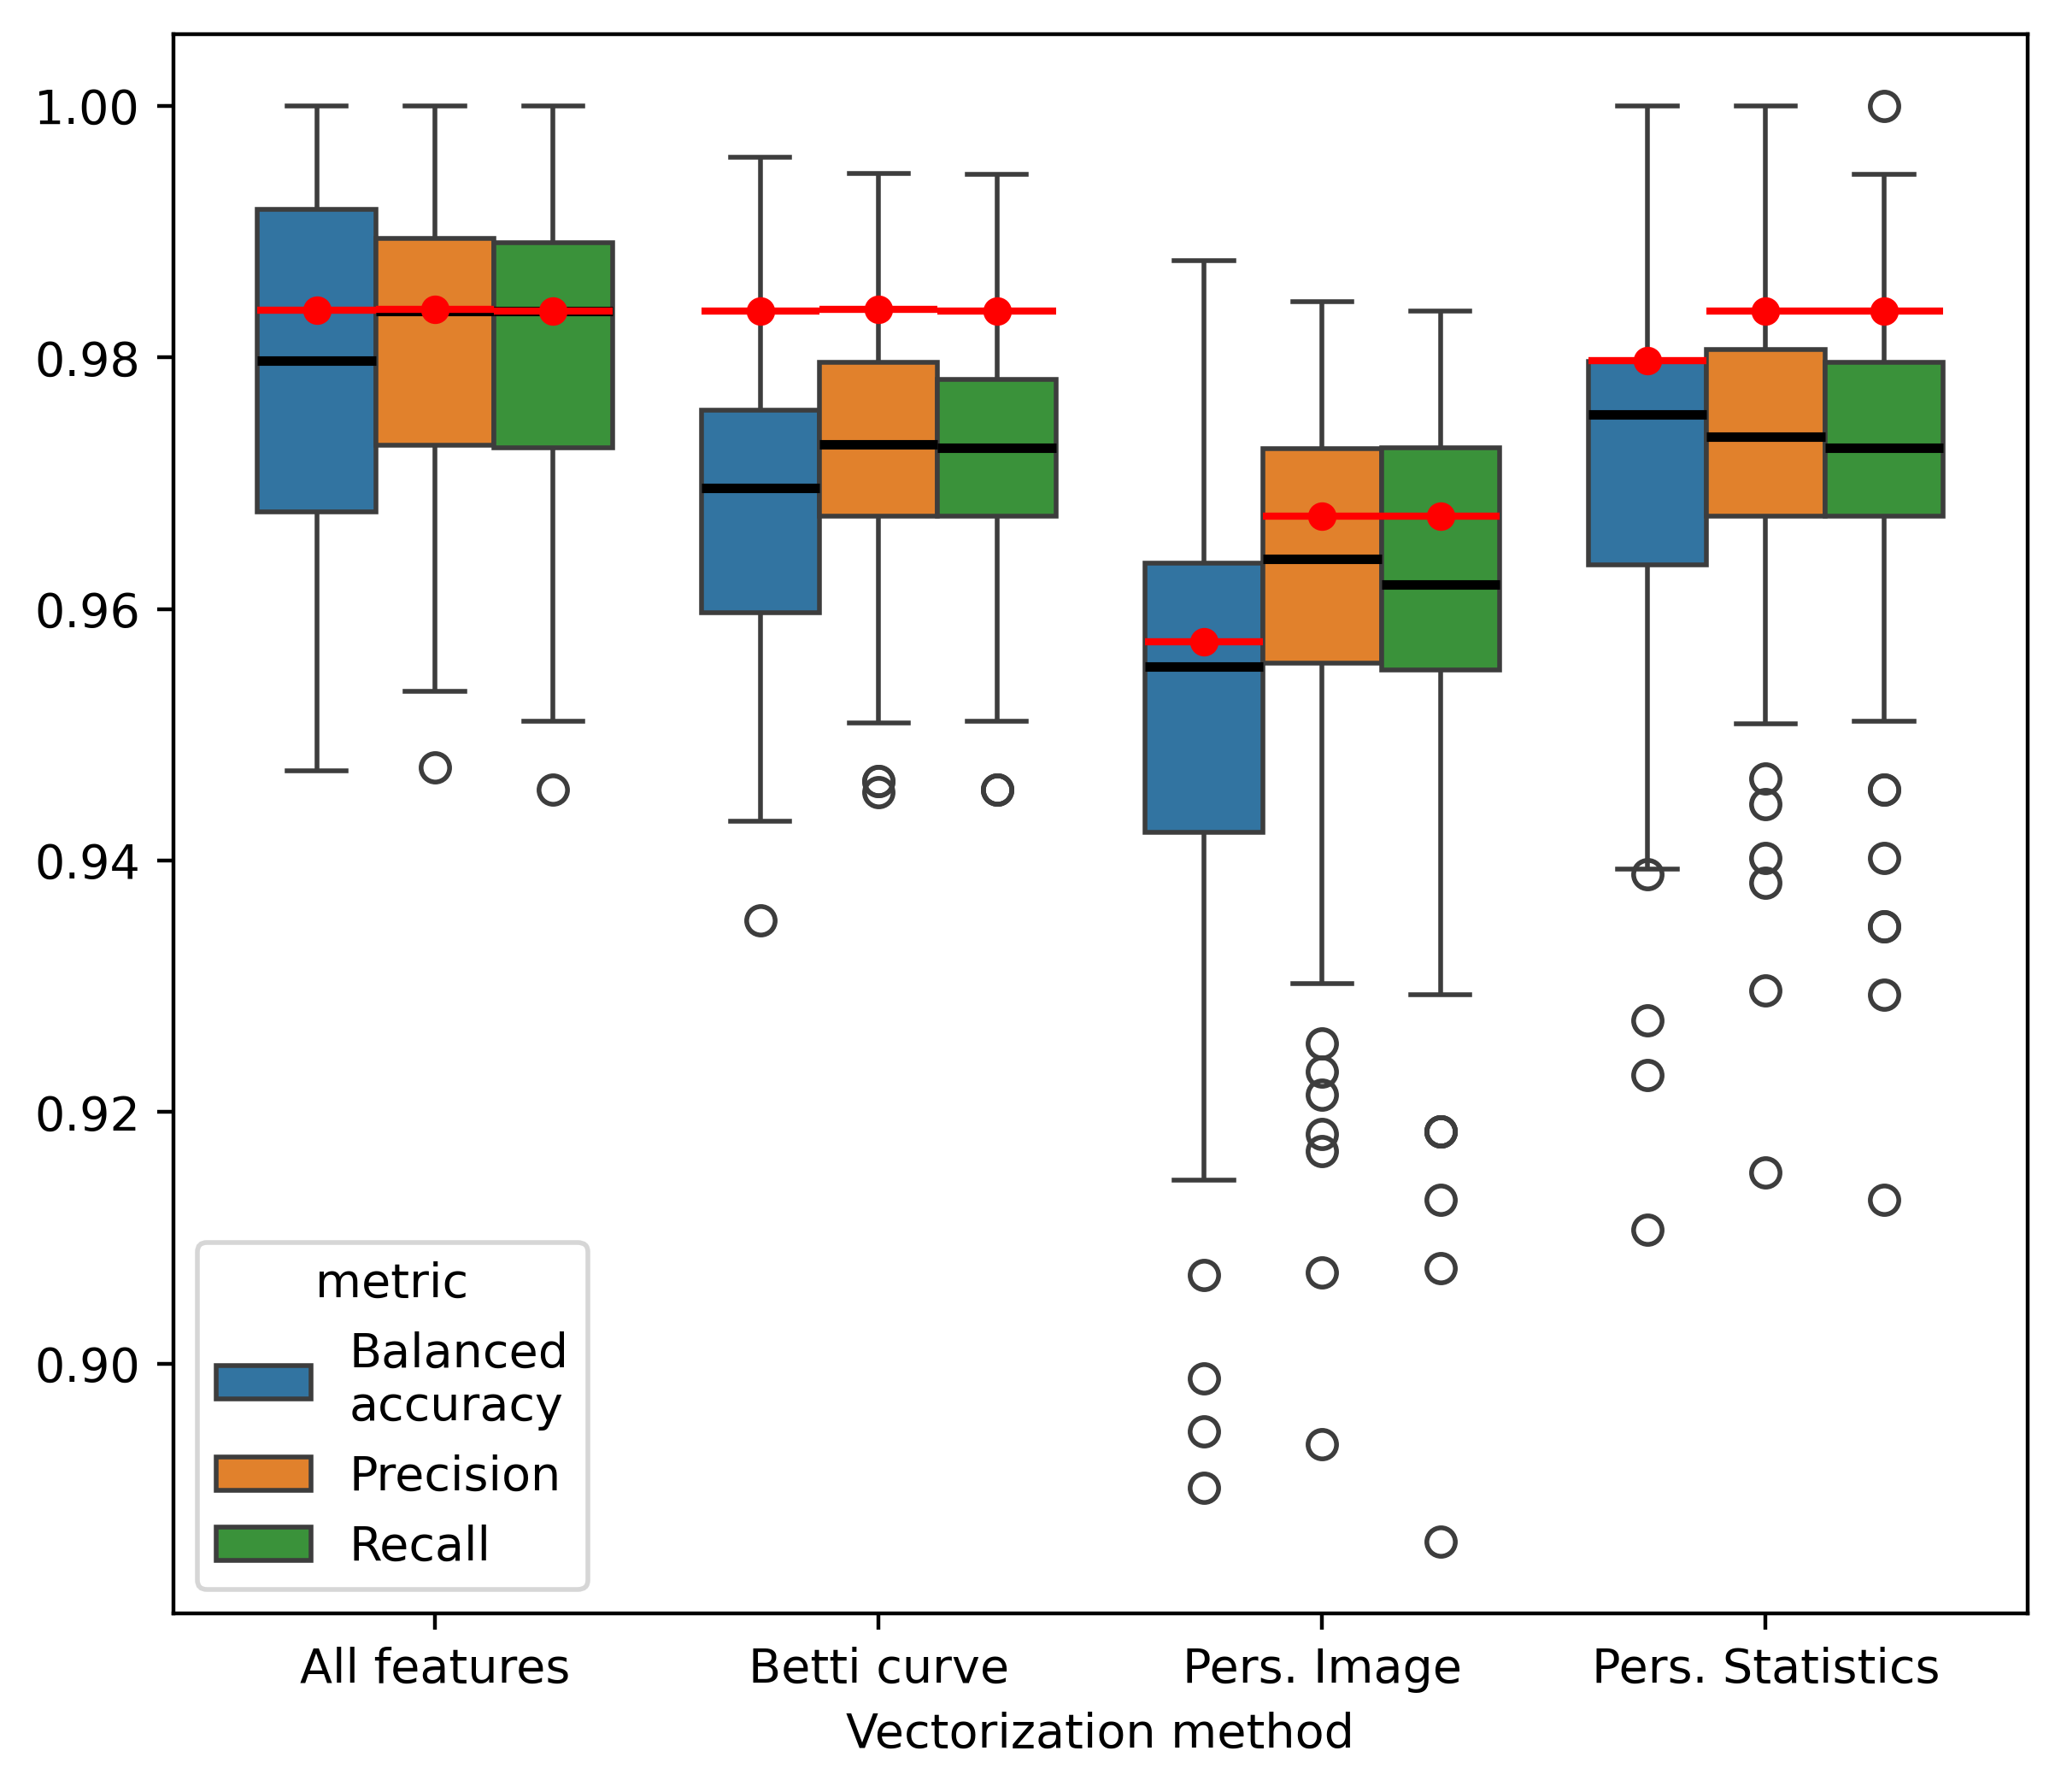

In [51]:
fig, ax = plt.subplots(figsize=(7, 6), dpi=400)
sns.boxplot(data=df_plot_sted, x='type', y='value', hue='metric', ax=ax,
    hue_order=hue_order, medianprops={'color': 'black', 'linewidth': 2})

valuepos = get_2d_medians_positions(ax, df_plot_sted2, hue_order)
diff = np.min(np.abs(np.diff(np.unique(valuepos[:,0]))))
for i, pos in enumerate(valuepos):
    ax.hlines(pos[1], pos[0] - diff/2, pos[0] + diff/2, color='red', linewidth=1.5, zorder=10, ls='-')
ax.scatter(valuepos[:,0], valuepos[:,1], color='red', marker='.', s=100, zorder=10)

ax.set_xlabel('Vectorization method')
ax.set_ylabel('')
# ax.set_title('STED')

fig.savefig(figures_path / 'sted_vectorization_performance_splitintometrics_3d2d.pdf', dpi=400, bbox_inches='tight')

In [ ]:
df_plot_airy.loc[df_plot_airy['metric'] == 'Balanced\naccuracy', :].groupby

type              metric     value
0        All features  Balanced\naccuracy  0.954545
1        All features  Balanced\naccuracy  0.933712
2        All features  Balanced\naccuracy  0.912879
3        All features  Balanced\naccuracy  0.892045
4        All features  Balanced\naccuracy  0.958333
..                ...                 ...       ...
595  Pers. Statistics  Balanced\naccuracy  1.000000
596  Pers. Statistics  Balanced\naccuracy  0.892045
597  Pers. Statistics  Balanced\naccuracy  1.000000
598  Pers. Statistics  Balanced\naccuracy  0.693182
599  Pers. Statistics  Balanced\naccuracy  0.937500

[400 rows x 3 columns]

TypeError: agg function failed [how->median,dtype->object]

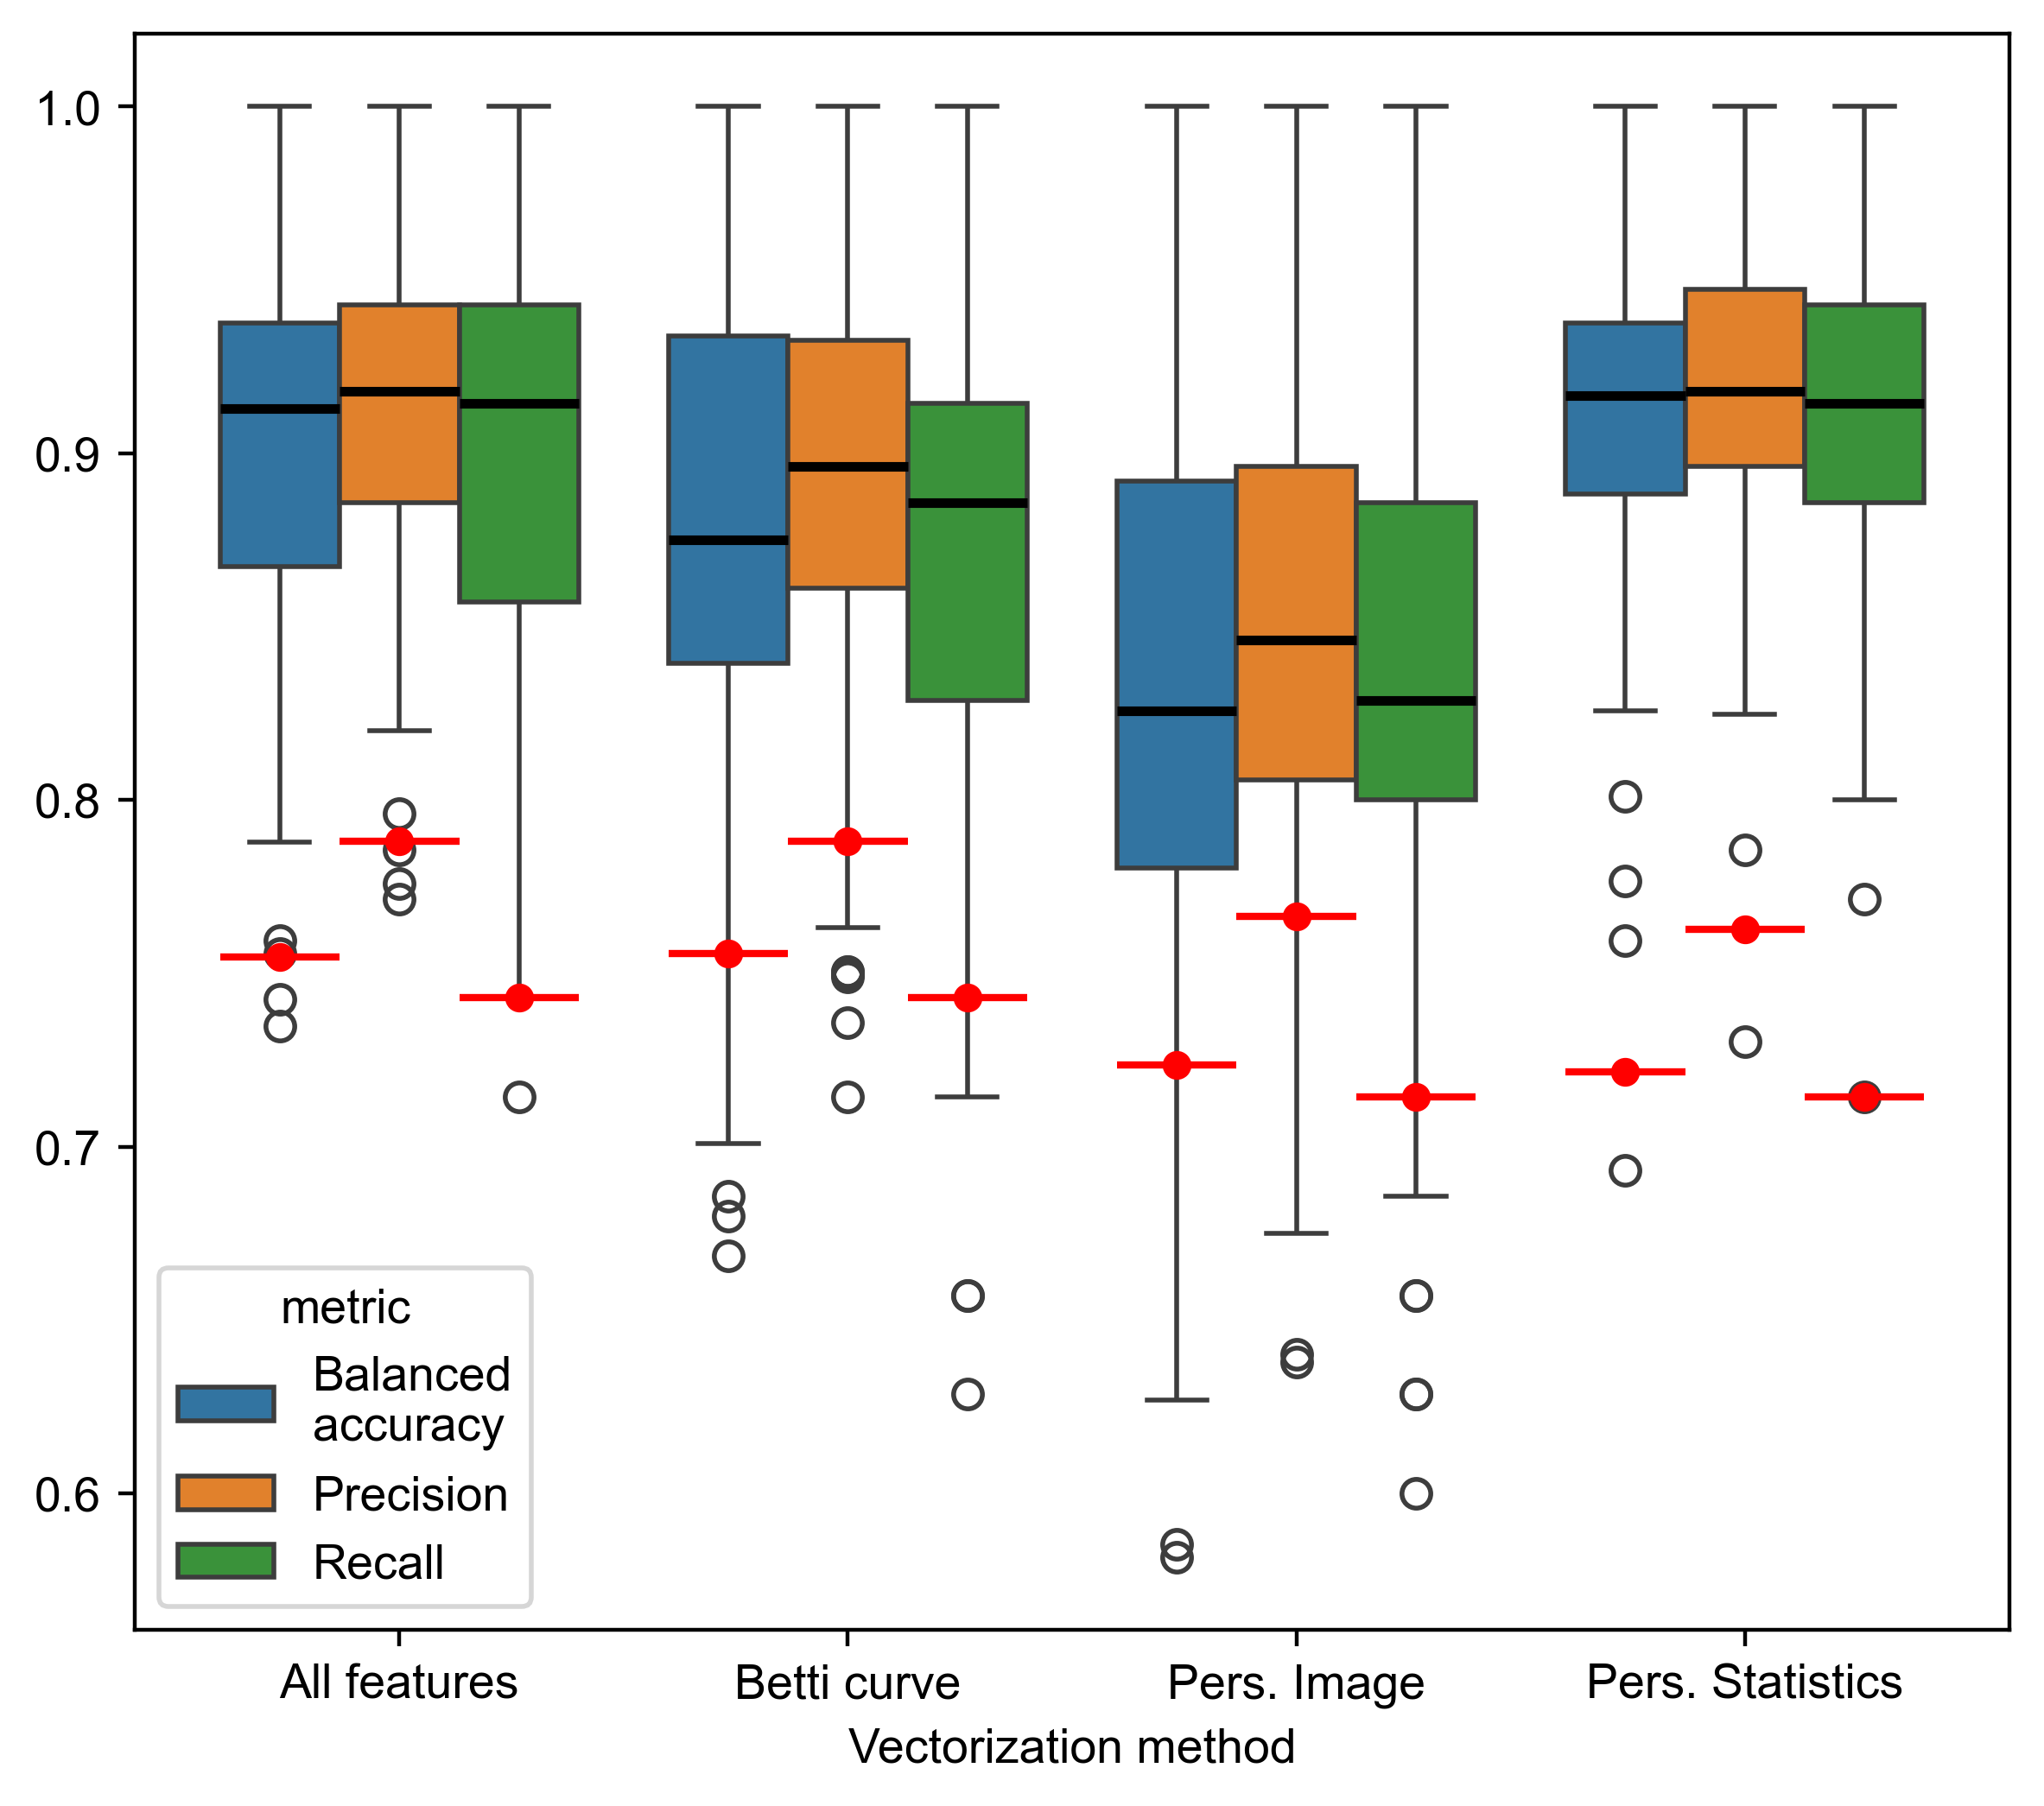

In [57]:
fig, ax = plt.subplots(figsize=(7, 6), dpi=400)
sns.boxplot(data=df_plot_airy, x='type', y='value', hue='metric', ax=ax,
    hue_order=hue_order, medianprops={'color': 'black', 'linewidth': 2})

valuepos = get_2d_medians_positions(ax, df_plot_airy2, hue_order)
diff = np.min(np.abs(np.diff(np.unique(valuepos[:,0]))))
for i, pos in enumerate(valuepos):
    ax.hlines(pos[1], pos[0] - diff/2, pos[0] + diff/2, color='red', linewidth=1.5, zorder=10, ls='-')
ax.scatter(valuepos[:,0], valuepos[:,1], color='red', marker='.', s=100, zorder=10)

ax.set_xlabel('Vectorization method')
ax.set_ylabel('')
# ax.set_title('Airyscan')
print(df_plot_airy.loc[df_plot_airy['metric'] == 'Balanced\naccuracy', :].groupby(['type']).agg(['median']).reset_index())

fig.savefig(figures_path / 'airyscan_vectorization_performance_splitintometrics_3d2d.pdf', dpi=400, bbox_inches='tight')

### continue

In [53]:
df_choice2.loc[:, 'type'] = 'Airyscan'
df_choice.loc[:, 'type'] = 'Sted'

df_choice_all = pd.concat([df_choice, df_choice2])

df_choice_all.groupby(['type', 'metric']).count()

value
type     metric                   
Airyscan Balanced\naccuracy    100
         Precision             100
         Recall                100
Sted     Balanced\naccuracy    100
         Precision             100
         Recall                100

In [54]:
df_choice_all.groupby(['type', 'metric']).mean()

value
type     metric                      
Airyscan Balanced\naccuracy  0.869564
         Precision           0.886982
         Recall              0.871429
Sted     Balanced\naccuracy  0.968870
         Precision           0.972946
         Recall              0.972446

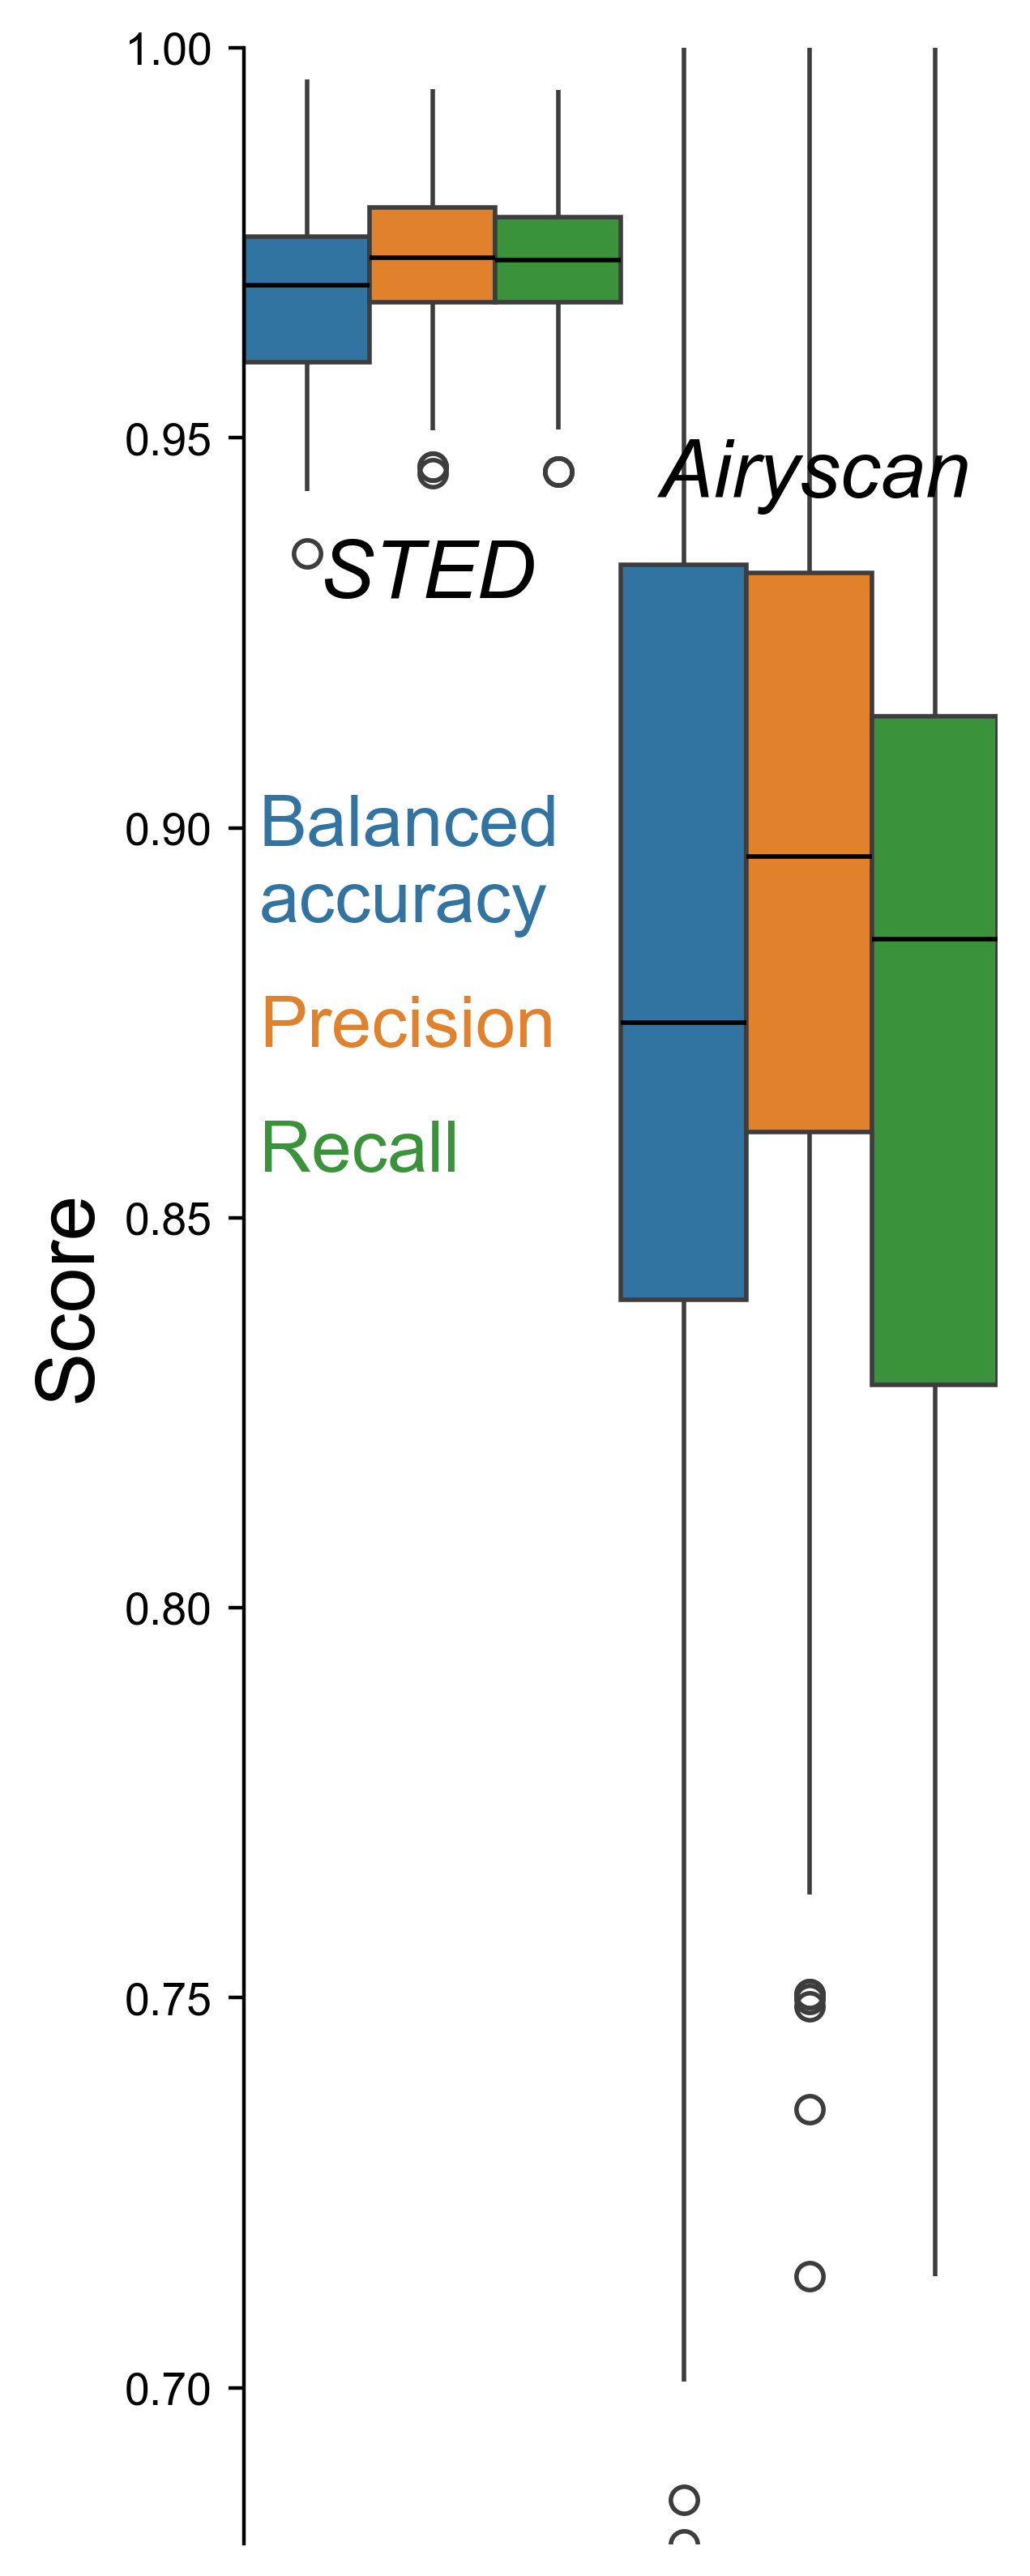

In [56]:
# pick betti curves

fig, ax = plt.subplots(1,1, figsize=(3,10), dpi=400)
sns.boxplot(data=df_choice_all, x='type', y='value', hue='metric',
            ax=ax,
            width=1, 
            # notch=True, 
            showcaps=False,
            medianprops={"color": "black", "linewidth": 1},
            # positions=[0]
            # native_scale=True
            )
for i, spine in enumerate(ax.spines.values()):
    if i > 0:
        spine.set_visible(False)
ax.set_xticks([])
ax.set_xlabel("")
ax.tick_params(axis='x', which='both',length=0)

ax.set_ylabel('Score', fontsize=18)
ax.set_ylim(0.68,1.0)

# make the yticks smaller (in an iteration of 0.01)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

# Modify legend: remove boxes and color labels
handles, labels = ax.get_legend_handles_labels()
# colors = [h.get_facecolor()[0][:3] for h in handles]  # Extract only RGB (ignore alpha)
colors = [tuple(list(h.get_facecolor())[:3]) for h in handles]

# Remove the original legend
ax.legend().remove()

# Create new legend with colored text
# for i, (label, color) in enumerate(zip(labels, colors)):
#     ax.text(0.55, 0.97 - i * 0.03, label, color=color, fontsize=20, transform=ax.transAxes)
for i, (label, color) in enumerate(zip(labels, colors)):
    ax.text(0.02, 0.65 - i * 0.05, label, color=color, fontsize=16, transform=ax.transAxes)

ax.text(0.55, 0.82, 'Airyscan', color='black', fontsize=18, transform=ax.transAxes, style='italic')
ax.text(0.1, 0.78, 'STED', color='black', fontsize=18, transform=ax.transAxes, style='italic')
# Change the text font to Arial
plt.rcParams['font.family'] = 'Arial'

fig.savefig(figures_path / 'boxplot_sted_vs_airy.png', bbox_inches='tight')
fig.savefig(figures_path / 'boxplot_sted_vs_airy.pdf', bbox_inches='tight')

# Dimensionality reduction: plots in the paper

## STED (persistence image or betti curve)

0.9999974870570795


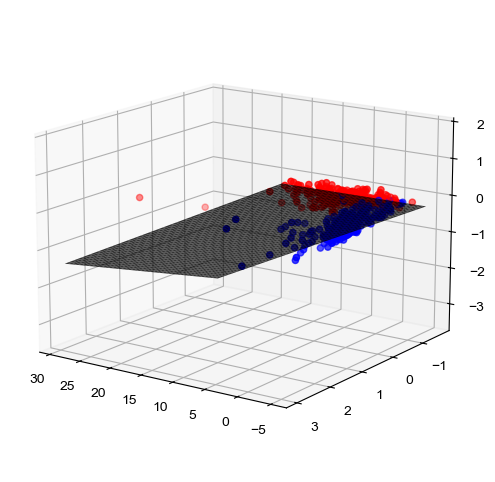

In [ ]:
df_tmp = pd.read_csv(Path(vectorization_sted, 'vectorizations_all_sted_clip_minmax_gaussian2c_minmax.csv'))
selection = [x for x in df_tmp.columns if 'labels' not in x and 'pi' in x and int(x.split('_')[2]) == 3]
Xt = df_tmp[selection].values
Xt = MinMaxScaler().fit_transform(Xt)

# Assume X and y are already defined
pca = PCA(n_components=3)
X = pca.fit_transform(Xt)
y = df_tmp['labels'].values.copy()

varexplained = np.sum(pca.explained_variance_ratio_)
print(varexplained)

from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

# Scatter plot with color based on y values
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
                c=colors, marker='o')
ax.azim = 125
ax.elev = 15

# Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Get the separating hyperplane
w = svm.coef_[0]
b = -w[0] / w[2]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = np.linspace(min(X[:, 1]), max(X[:, 1]))
YY, XX = np.meshgrid(yy, xx)

# Compute ZZ only if w[2] is not zero
if abs(w[2]) > 1e-10:  # Prevent division by zero or near-zero errors
    ZZ = (-w[0] * XX - w[1] * YY - b) / w[2]
else:
    ZZ = np.full_like(XX, np.mean(X[:, 2]))  # Use mean Z-plane if w[2] is too small

# Plot the separating hyperplane
ax.plot_surface(XX, YY, ZZ, color='black', alpha=0.8)

0.9999974870570815
0.9644351464435147


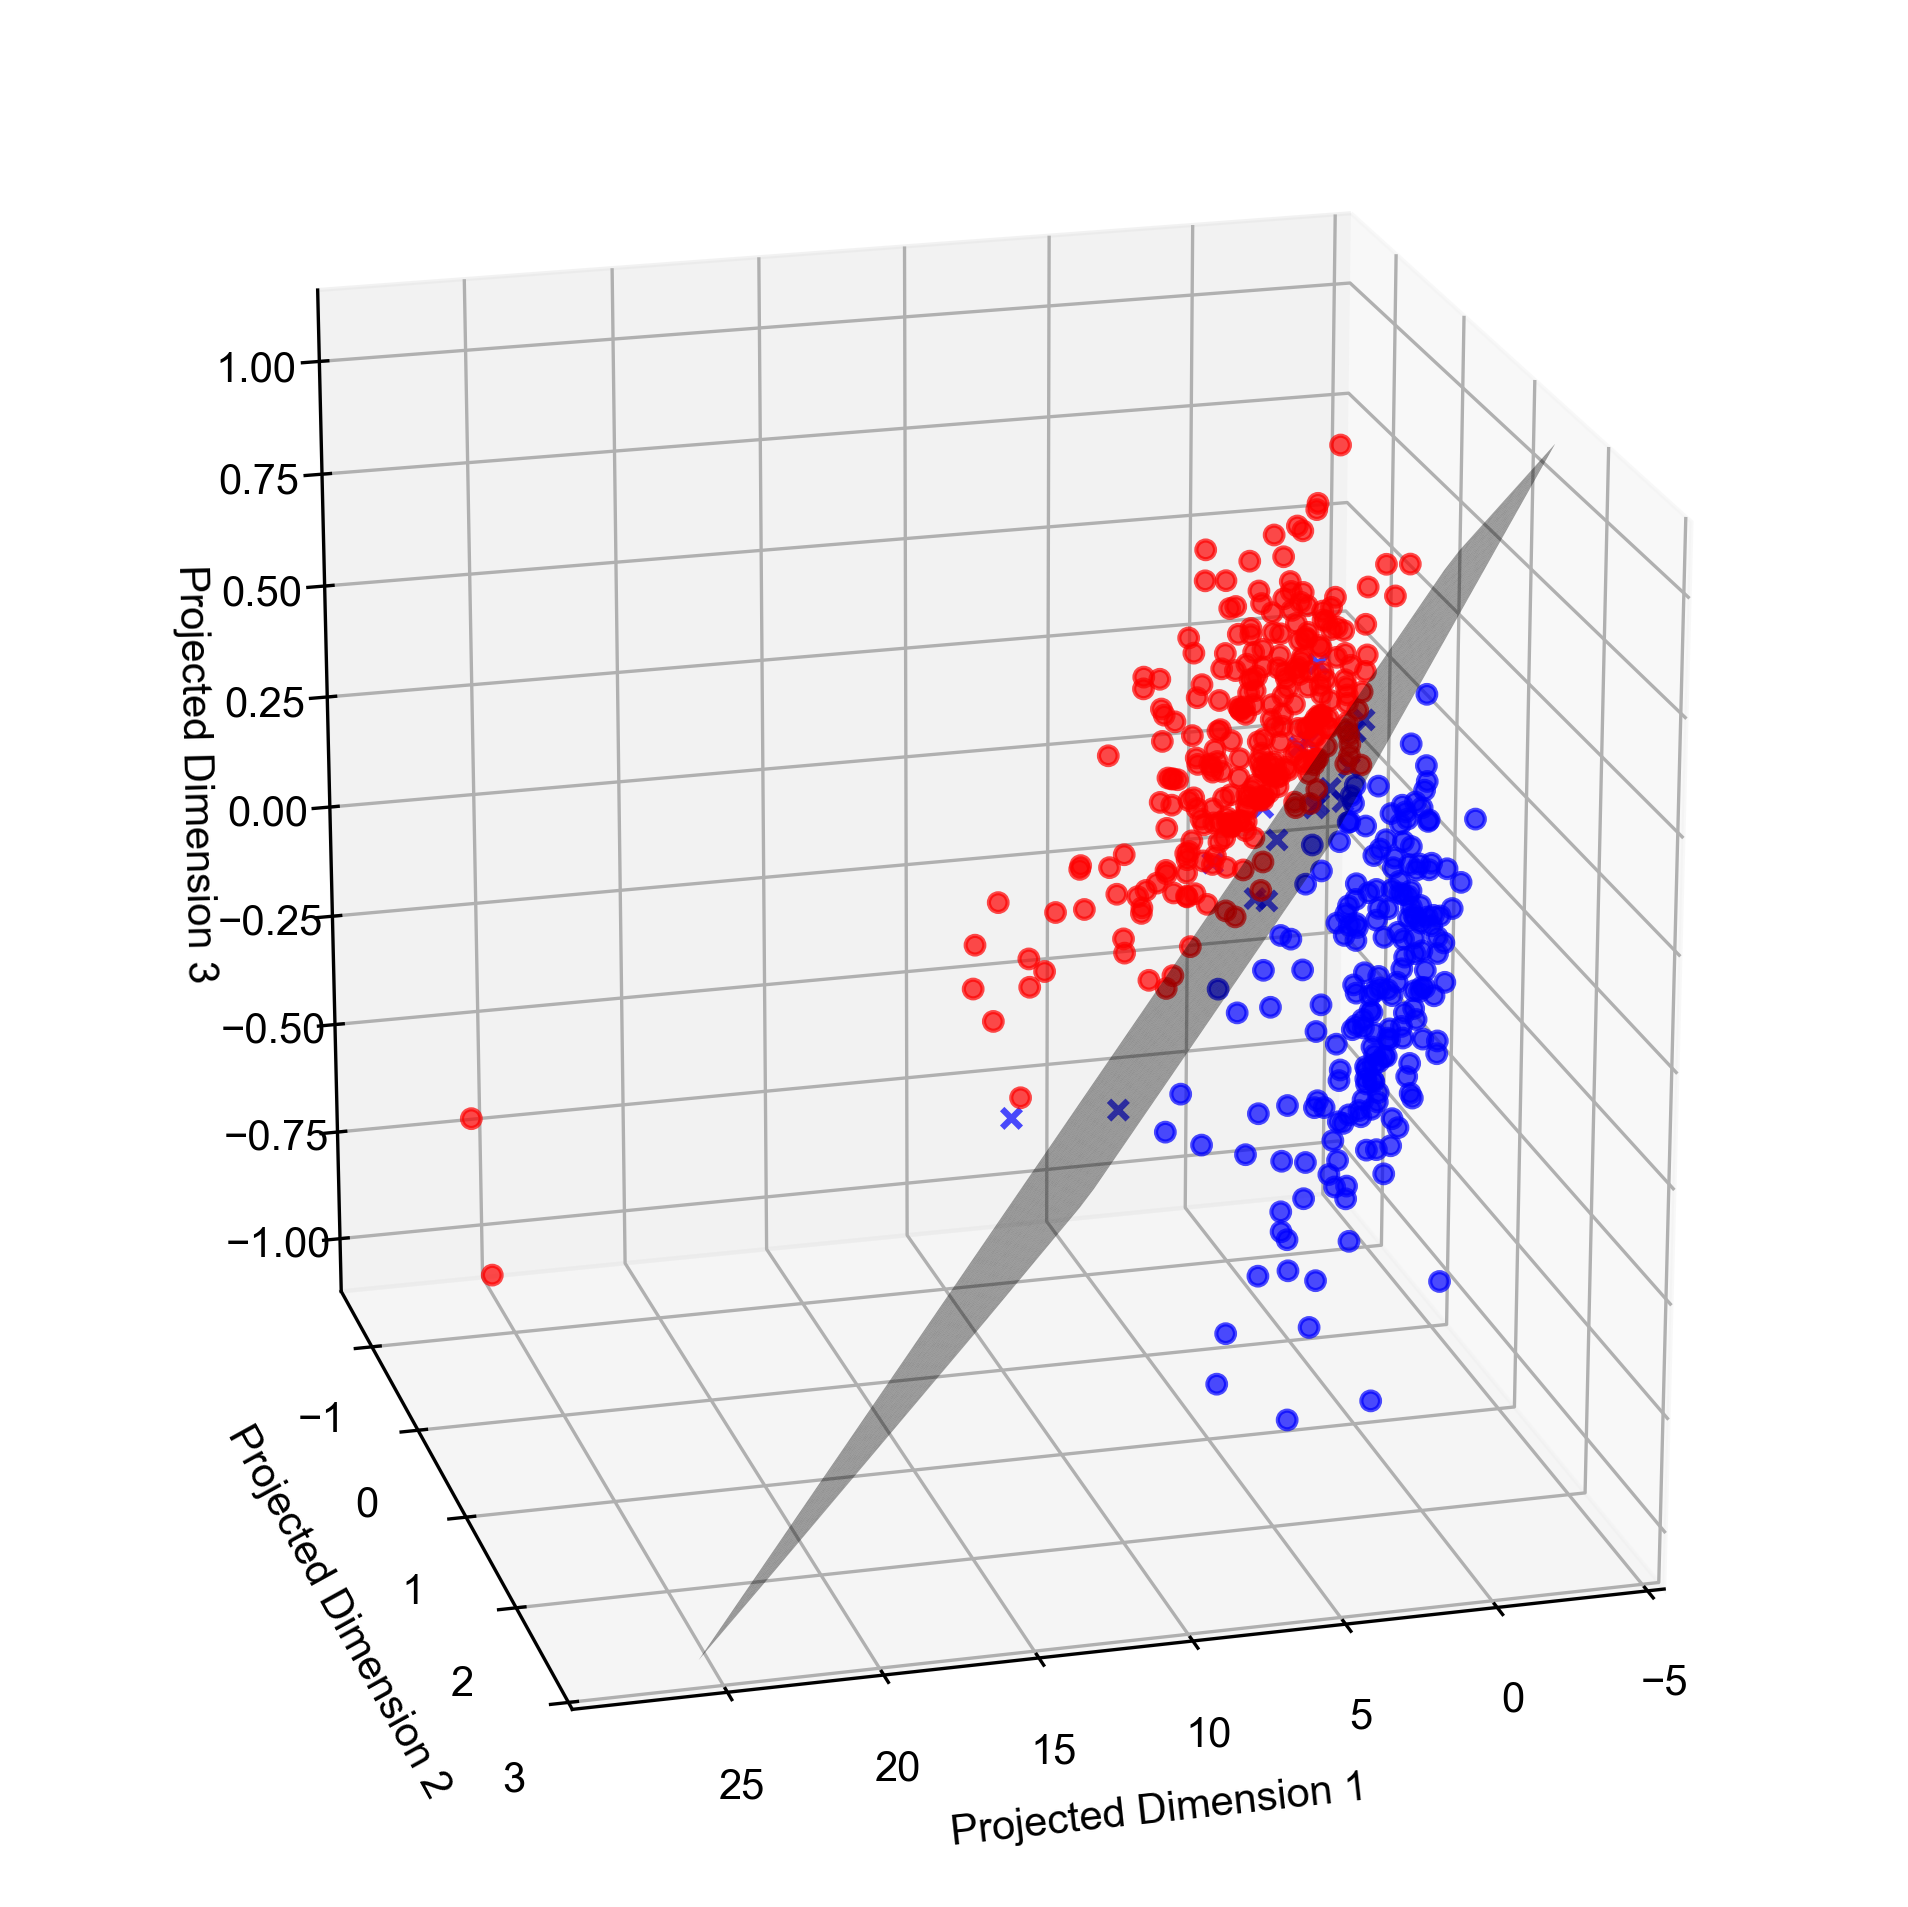

In [ ]:
df_tmp = pd.read_csv(Path(vectorization_sted, 'vectorizations_all_sted_clip_minmax_gaussian2c_minmax.csv'))
selection = [x for x in df_tmp.columns if 'labels' not in x and 'pi' in x and int(x.split('_')[2]) == 3]
Xt = df_tmp[selection].values
Xt = MinMaxScaler().fit_transform(Xt)
y = df_tmp['labels'].copy()

# Assume X and y are already defined
pca = PCA(n_components=3)
X = pca.fit_transform(Xt)

print(np.sum(pca.explained_variance_ratio_))

svm = SVC(kernel='linear')
svm.fit(X, y)
print(svm.score(X, y))

# Get the separating hyperplane
w = svm.coef_[0]
b = -w[0] / w[2]

xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = np.linspace(min(X[:, 1]), max(X[:, 1]))
YY, XX = np.meshgrid(yy, xx)
# YY, XX = np.meshgrid(np.unique(X[:,1]), np.unique(X[:,0]))

# Plot the separating hyperplane
if abs(w[2]) > 1e-10:
    ZZ = (-w[0] * XX - w[1] * YY - svm.intercept_[0]) / w[2]
else:
    ZZ = np.full_like(XX, np.mean(X[:, 2]))

# ax.plot_surface(XX, YY, ZZ, color='black', alpha=0.9)
mask = (ZZ >= np.min(X[:,2])) & (ZZ <= np.max(X[:,2]))
XX, YY, ZZ = XX[mask], YY[mask], ZZ[mask]

fig = plt.figure(figsize=(8, 8), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(XX.ravel(), YY.ravel(), ZZ.ravel(), color='black', alpha=0.4)

# plot the points
idx_right = np.where(svm.predict(X) == y)[0]
idx_wrong = np.where(svm.predict(X) != y)[0]

colors_right = np.array([red if yx == 0 or yx == 'ES' else blue for yx in y[idx_right]])
colors_wrong = np.array([red if yx == 0 or yx == 'ES' else blue for yx in y[idx_wrong]])

red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = np.array([red if yx == 0 or yx == 'ES' else blue for yx in y])

# Scatter plot with color based on y values
sc = ax.scatter(X[idx_right, 0], X[idx_right, 1], X[idx_right, 2], 
                c=colors_right, marker='o', alpha=0.7)
sc = ax.scatter(X[idx_wrong, 0], X[idx_wrong, 1], X[idx_wrong, 2], 
                c=colors_wrong, marker='x', alpha=0.7)

ax.set_box_aspect([1,1,1])
ax.margins(0)

# ax.azim = 1.87
ax.azim = 75
ax.elev = 20
ax.dist = 1
ax.set_xlabel('Projected Dimension 1')
ax.set_ylabel('Projected Dimension 2')
ax.set_zlabel('Projected Dimension 3')

fig.savefig(figures_path / 'svm_hyperplane_alignment_sted_pi_3d.pdf', dpi=400, bbox_inches='tight')
fig.savefig(figures_path / 'svm_hyperplane_alignment_sted_pi_3d.png', dpi=400)

In [ ]:
try:
    import plotly.graph_objects as go

except ImportError as e:
    print("Required module is not installed:", e)

# Create figure
fig = go.Figure()

# Scatter plot of data points
fig.add_trace(go.Scatter3d(
    x=X[idx_right, 0],
    y=X[idx_right, 1],
    z=X[idx_right, 2],
    mode='markers',
    marker=dict(color=colors[idx_right], size=5),
    showlegend=True
))
fig.add_trace(go.Scatter3d(
    x=X[idx_wrong, 0],
    y=X[idx_wrong, 1],
    z=X[idx_wrong, 2],
    mode='markers',
    marker=dict(color=colors[idx_wrong], size=3, symbol='x')
))
fig.update_layout(
    width=1000,  # Increase width
    height=800,  # Increase height
)

# Generate hyperplane grid
xx = np.linspace(min(X[:, 0]), max(X[:, 0]), 20)
yy = np.linspace(min(X[:, 1]), max(X[:, 1]), 20)
YY, XX = np.meshgrid(yy, xx)

if abs(w[2]) > 1e-6:
    ZZ = (-w[0] * XX - w[1] * YY - svm.intercept_[0]) / w[2]
else:
    ZZ = np.full_like(XX, np.mean(X[:, 2]))

# Add hyperplane as a surface
fig.add_trace(go.Surface(x=XX, y=YY, z=ZZ, colorscale='Greys', opacity=0.5, showscale=False))

# Update layout for interactivity
fig.update_layout(
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    ),
    title="Interactive 3D SVM Hyperplane",
    showlegend=False,
    scene_camera=dict(
        eye=dict(x=1.87, y=0.88, z=-0.64)
    )
)
# Extract camera settings from a Plotly figure
camera = fig.layout.scene.camera

azim = camera.eye.x  # Azimuth-like value
elev = camera.eye.y  # Elevation-like value
dist = camera.eye.z  # Distance from the plot

print(f"Azimuth: {azim}, Elevation: {elev}, Distance: {dist}")

fig.show()

Azimuth: 1.87, Elevation: 0.88, Distance: -0.64


0.99999748705708


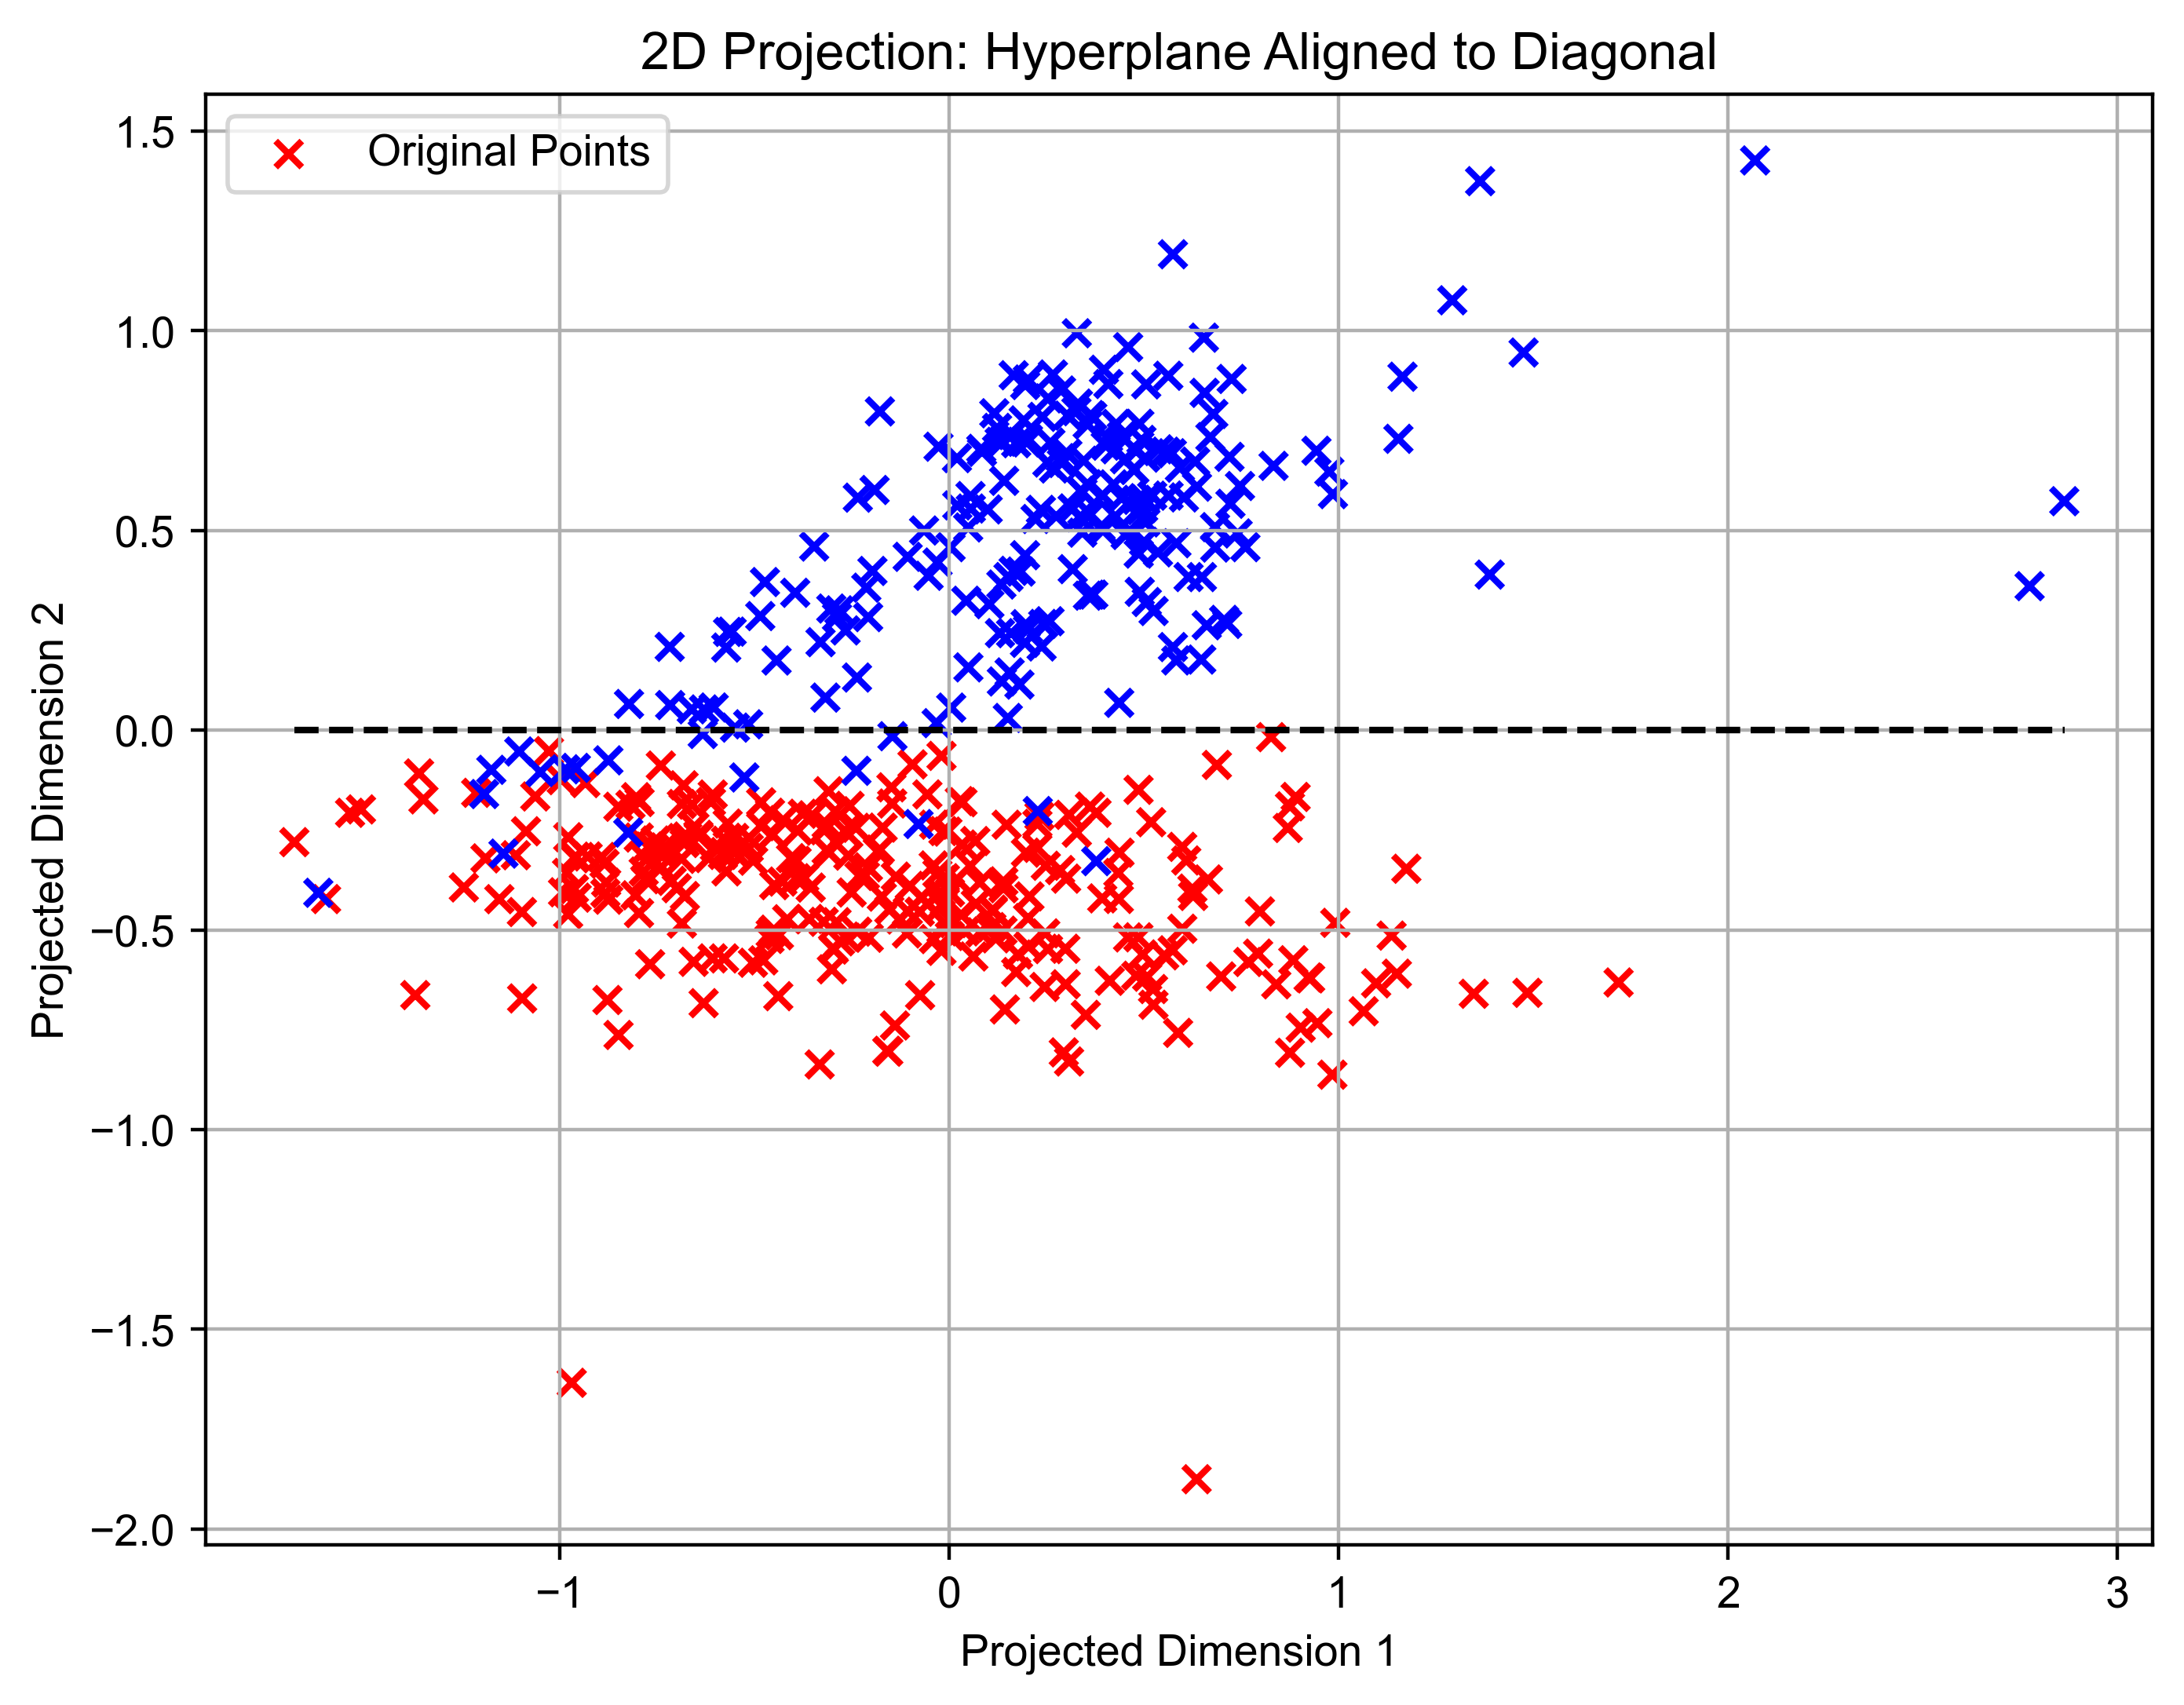

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm

df_tmp = pd.read_csv(Path(vectorization_sted, 'vectorizations_all_sted_clip_minmax_gaussian2c_minmax.csv'))
selection = [x for x in df_tmp.columns if 'labels' not in x and 'pi' in x and int(x.split('_')[2]) == 3]
Xt = df_tmp[selection].values
Xt = MinMaxScaler().fit_transform(Xt)
y = df_tmp['labels'].copy()

# Assume X and y are already defined
pca = PCA(n_components=3)
X = pca.fit_transform(Xt)

varexplained = np.sum(pca.explained_variance_ratio_)
print(varexplained)

# Train SVM with a linear kernel
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

# Extract hyperplane parameters
w = clf.coef_[0]  # Normal vector to the hyperplane
b = clf.intercept_[0]

# Compute two orthonormal basis vectors that span the hyperplane
w_norm = w / np.linalg.norm(w)  # Normalize w
U, _, _ = np.linalg.svd(np.eye(3) - np.outer(w_norm, w_norm))  # Find orthonormal basis
basis_1, basis_2 = U[:, 1], U[:, 2]  # Two vectors spanning the hyperplane

# Project points onto the hyperplane
distances = (X @ w + b) / np.linalg.norm(w)  # Signed distances
X_hyper = X - np.outer(distances, w_norm)  # Projected points

# Transform hyperplane points into 2D
X_2D = np.column_stack([X_hyper @ basis_1, X_hyper @ basis_2])
Xorg_2D = np.column_stack([X @ basis_1, X @ basis_2])

# Rotate to align with the diagonal (45-degree rotation)
theta = np.pi
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
X_2D_rotated = X_2D @ rotation_matrix
Xorg_2D_rotated = Xorg_2D @ rotation_matrix

y_unq = np.unique(X_2D_rotated[:,1])
assert np.all(np.diff(y_unq) < 1e-14)
y_unq = np.mean(y_unq)


red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

# Scatter plot in 2D
plt.figure(figsize=(8, 6), dpi=400)
plt.hlines(0, np.min(Xorg_2D_rotated[:, 0]), np.max(Xorg_2D_rotated[:, 0]), color='black', linestyle='--')
plt.scatter(Xorg_2D_rotated[:, 0], Xorg_2D_rotated[:, 1]-y_unq,
            color=colors, marker='x', label="Original Points")

# Labels
plt.xlabel("Projected Dimension 1")
plt.ylabel("Projected Dimension 2")
plt.title("2D Projection: Hyperplane Aligned to Diagonal")
plt.legend()
plt.grid()

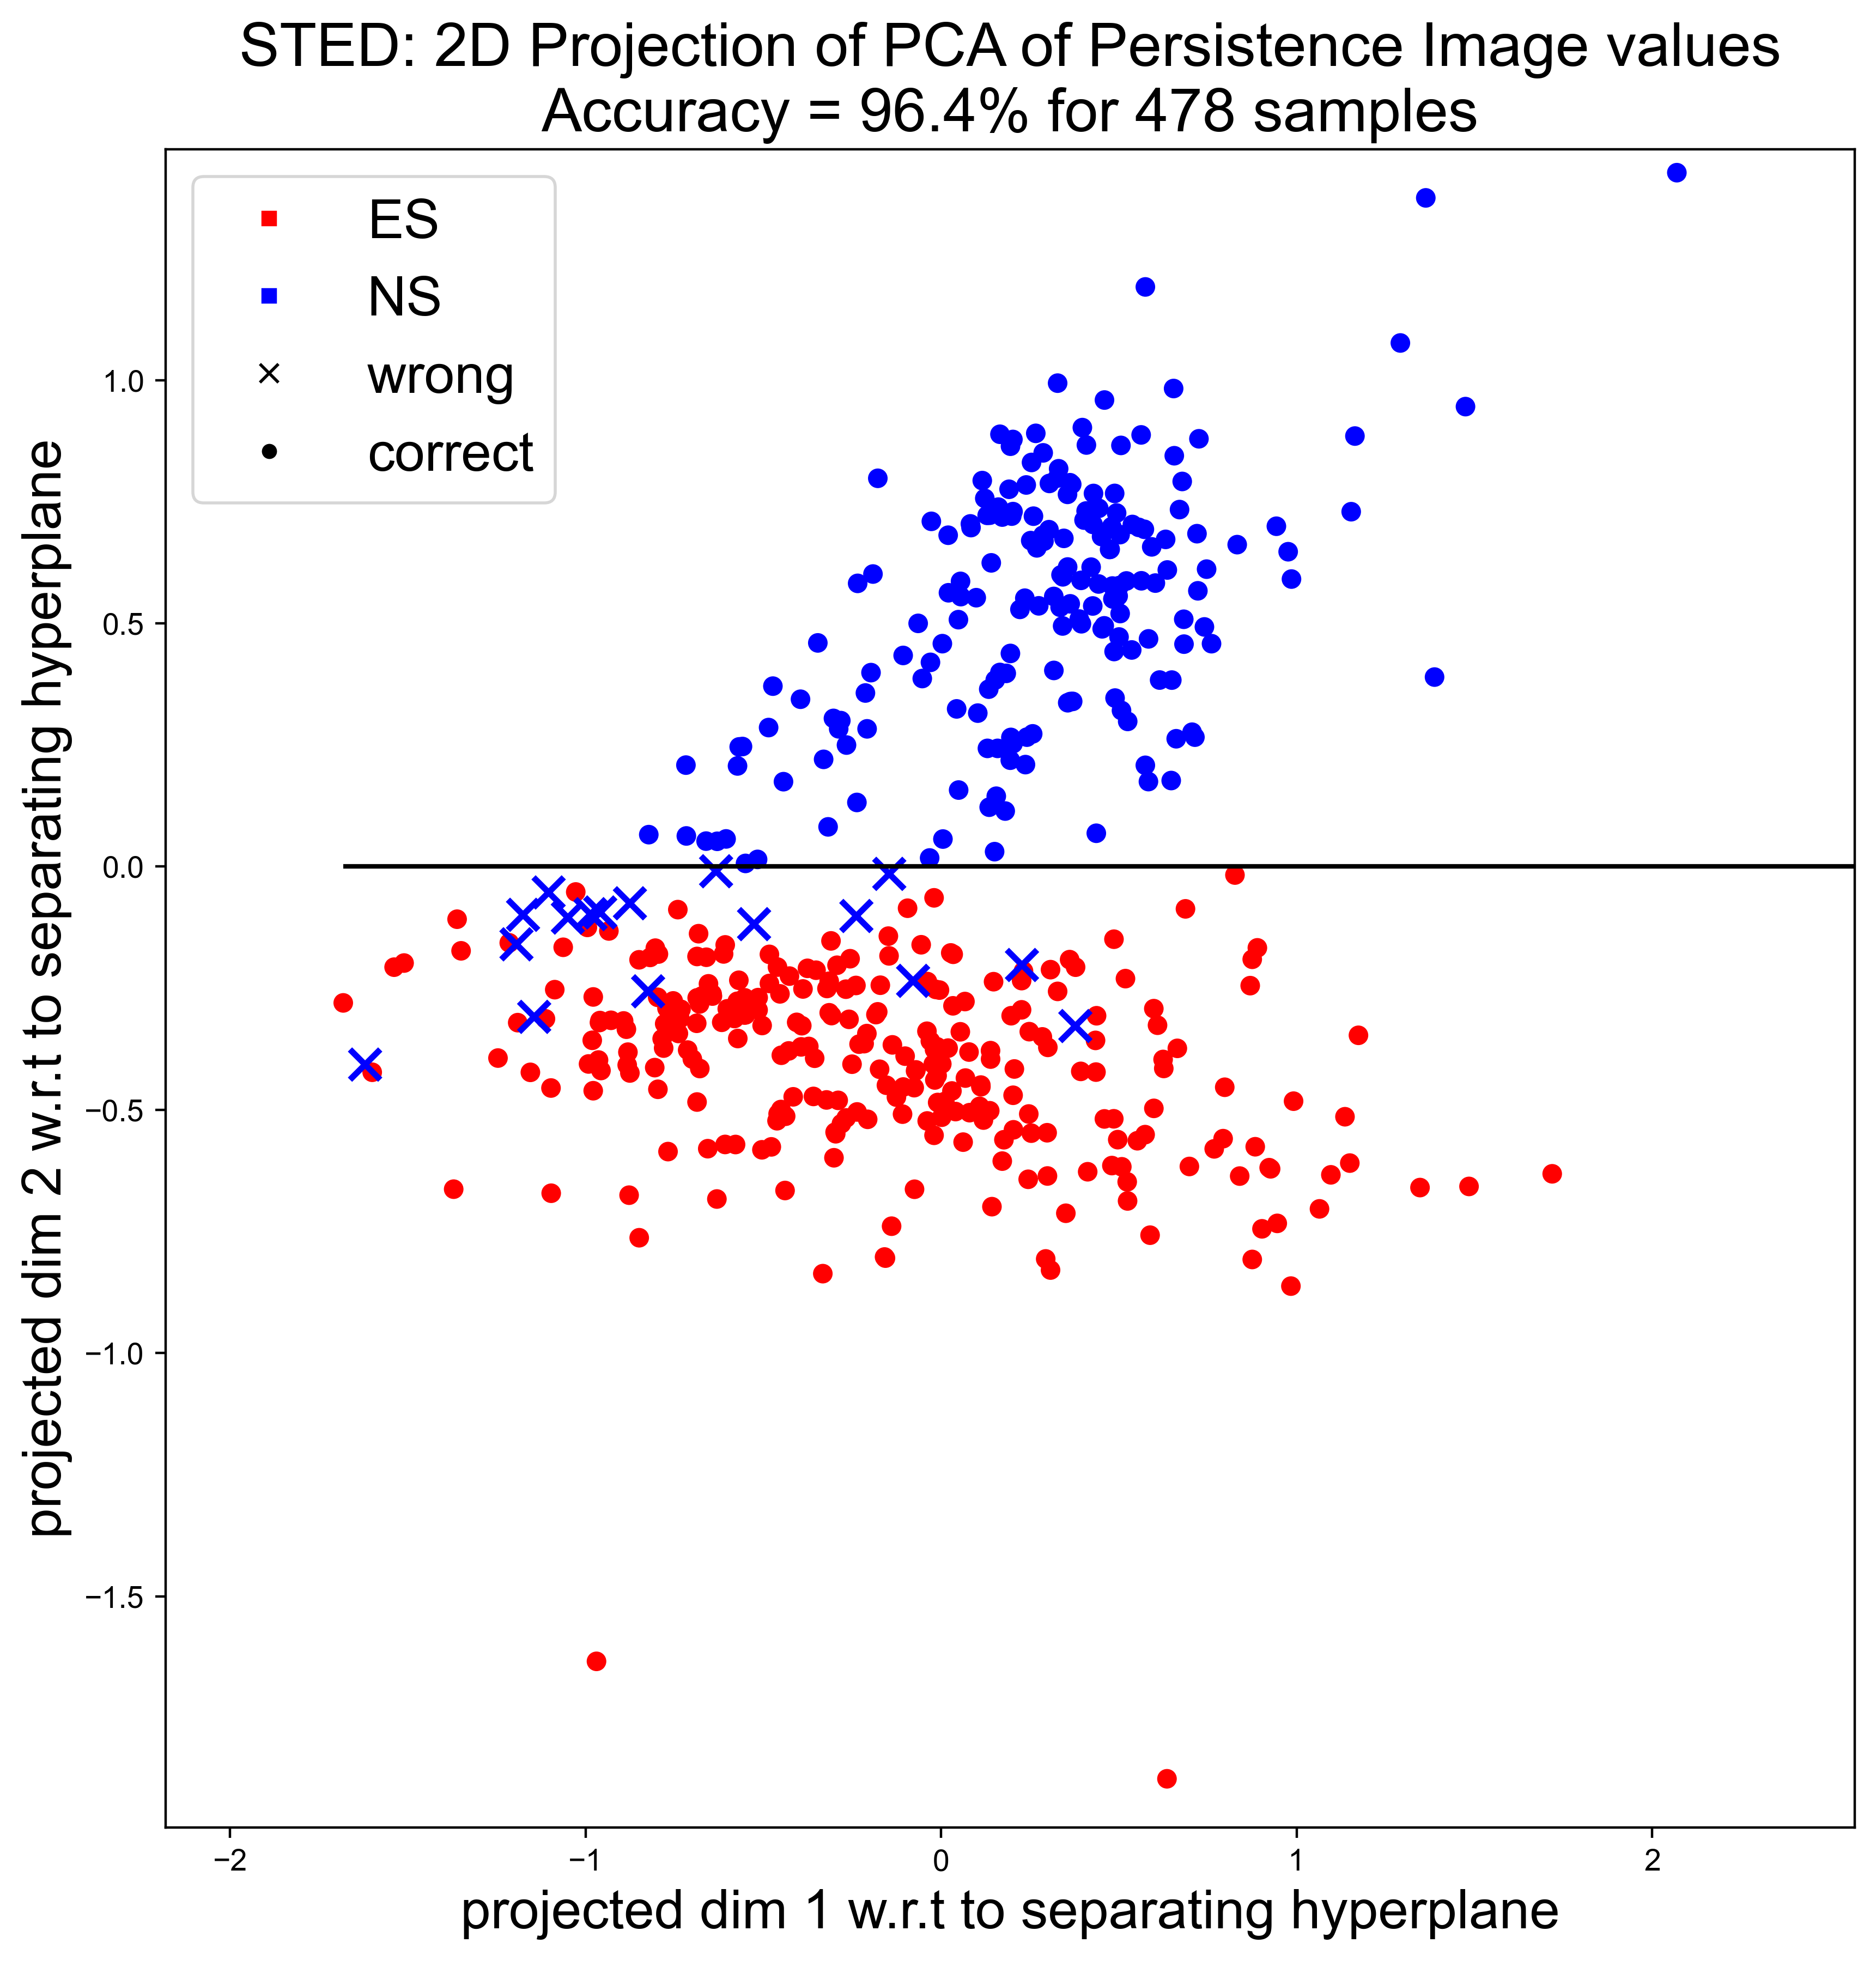

In [ ]:
import matplotlib.lines as mlines

plt.rcParams['font.family'] = 'Arial'

# Scatter plot in 2D
fig, ax = plt.subplots(figsize=(10,10), dpi=400)
ax.hlines(0, np.min(X_2D_rotated[:, 0]), np.max(X_2D_rotated[:, 0]), color='black')

ypredict = model.predict(X)
idx_right = ypredict == y
idx_wrong = ypredict != y

# ax.scatter(Xorg_2D_rotated[idx_right, 0], Xorg_2D_rotated[idx_right, 1]-y_unq,
#            c=y[idx_right],
#            cmap="coolwarm",
#            marker='.',
#            label="Correct Points")
# ax.scatter(Xorg_2D_rotated[idx_wrong, 0], Xorg_2D_rotated[idx_wrong, 1]-y_unq,
#            c=y[idx_wrong],
#            cmap="coolwarm",
#            marker='x',
#            label="Incorrect Points")

red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

idx_sort = np.argsort(Xorg_2D_rotated[:, 0])
Xplot = Xorg_2D_rotated[idx_sort, :]
yplot = y[idx_sort]
idx_right = idx_right[idx_sort]
idx_wrong = idx_wrong[idx_sort]

colors_right = [red if yx == 0 or yx == 'ES' else blue for yx in yplot[idx_right]]
colors_wrong = [red if yx == 0 or yx == 'ES' else blue for yx in yplot[idx_wrong]]

ax.scatter(Xplot[idx_right, 0], Xplot[idx_right, 1]-y_unq,
           c=colors_right,
           marker='.',
           s=120, #edgecolors='black', #alpha=0.8,
           label="Correct Points")
ax.scatter(Xplot[idx_wrong, 0], Xplot[idx_wrong, 1]-y_unq,
           c=colors_wrong,
           marker='x',
           s=100, #edgecolors='black',
           lw=2,
           label="Incorrect Points")

# we have two outliers; we remove them
sortedxvals = np.sort(Xorg_2D_rotated[:, 0])
lastx_incluster = sortedxvals[np.argmax(np.diff(sortedxvals))]

idx_inside = np.where(Xorg_2D_rotated[:, 0] < lastx_incluster)[0]
ax.set_xlim(sortedxvals[0]-0.5, lastx_incluster+0.5)
ax.set_ylim(np.min(Xorg_2D_rotated[idx_inside, 1])-y_unq-0.1,
            np.max(Xorg_2D_rotated[idx_inside, 1])-y_unq+0.1)

# Labels
plt.xlabel("projected dim 1 w.r.t to separating hyperplane", fontsize=18)
plt.ylabel("projected dim 2 w.r.t to separating hyperplane", fontsize=18)
plt.title("STED: 2D Projection of PCA of Persistence Image values\nAccuracy = {:.1f}% for {:d} samples".format(np.mean(idx_right)*100, len(idx_right)),
          fontsize=20)
# Add two points to the legend

handles, labels = ax.get_legend_handles_labels()
colors = plt.cm.coolwarm([0,300])

# handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=red, markersize=6, label='ES'))
# handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=blue, markersize=6, label='NS'))

handles = [mlines.Line2D([], [], marker='s', color='w', markerfacecolor=red, markersize=6, label='ES'),
           mlines.Line2D([], [], marker='s', color='w', markerfacecolor=blue, markersize=6, label='NS'),
           mlines.Line2D([], [], marker='x', color='black', markersize=6, linestyle=None, lw=0, label='wrong'),
           mlines.Line2D([], [], marker='o', color='w', markerfacecolor='black', markersize=6, label='correct')
           ]
ax.legend(handles=handles, fontsize=18)

fig.savefig(figures_path / 'svm_hyperplane_alignment_sted_pi.pdf', dpi=400, bbox_inches='tight')
fig.savefig(figures_path / 'svm_hyperplane_alignment_sted_pi.png', dpi=400)

## Betti Curve STED

0.8225362313189443


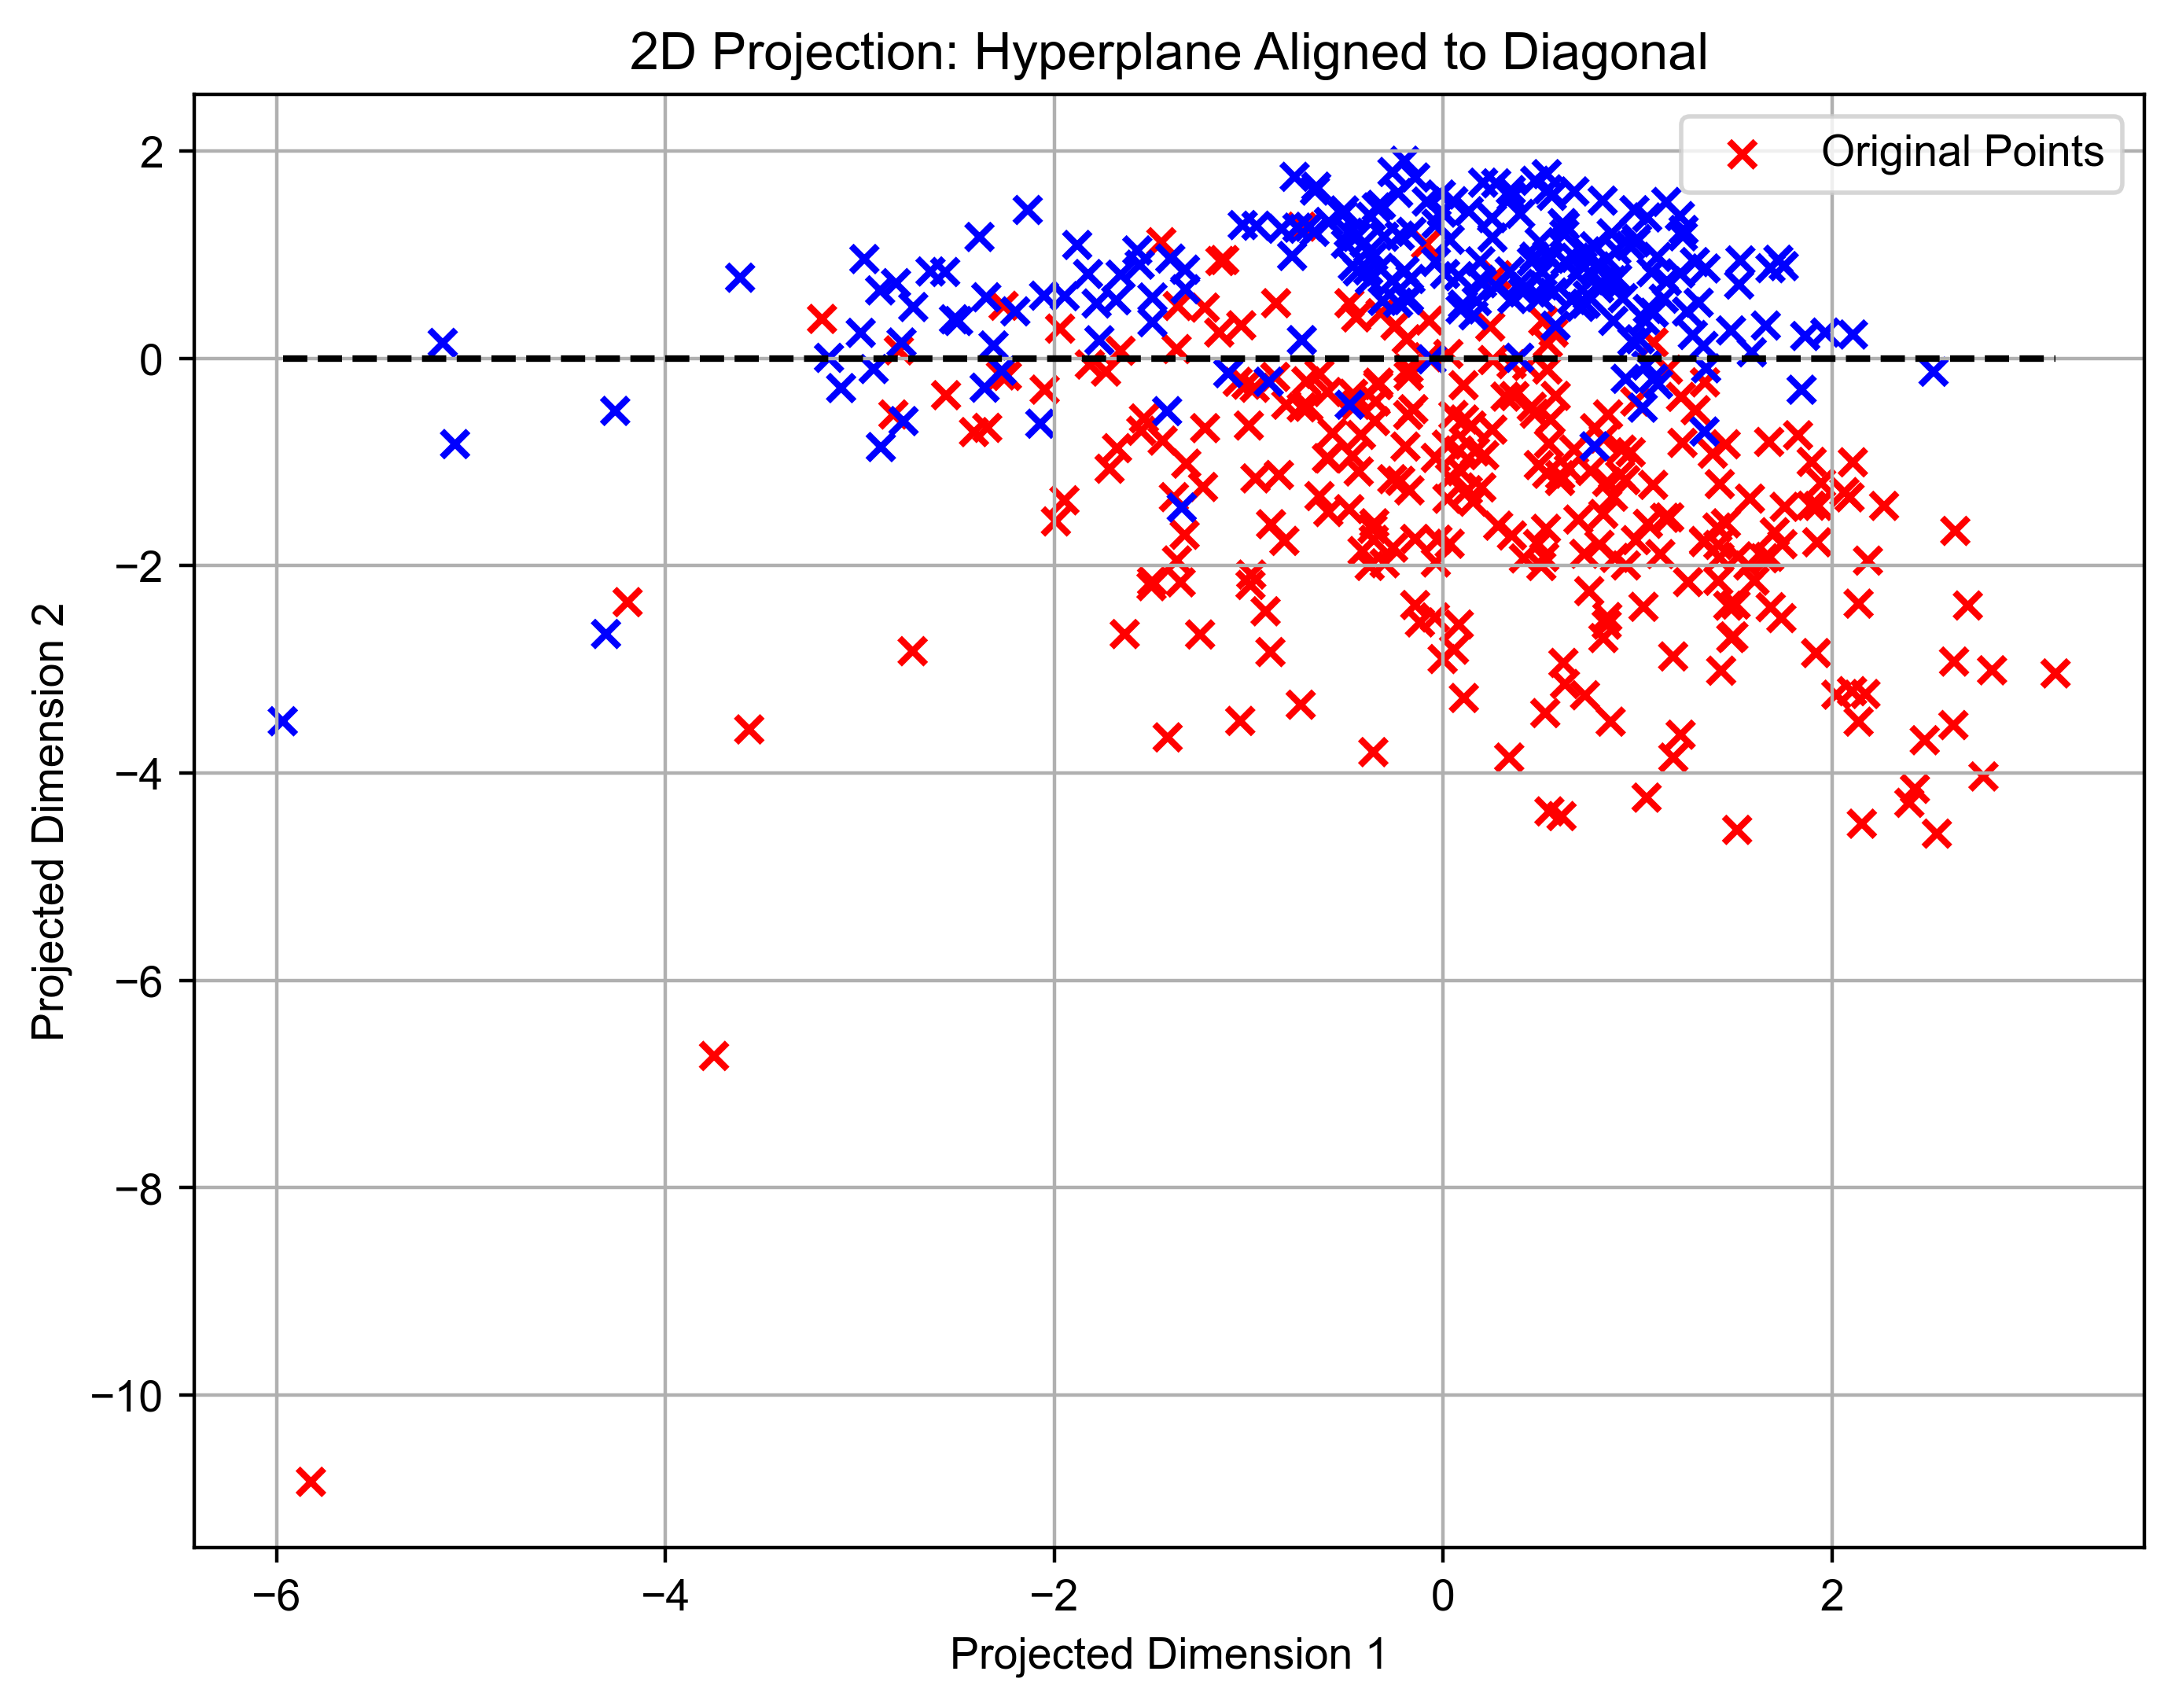

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm

df_tmp = pd.read_csv(Path(vectorization_sted, 'vectorizations_all_sted_clip_minmax_gaussian2c_minmax.csv'))
selection = [x for x in df_tmp.columns if 'labels' not in x and 'bc' in x and int(x.split('_')[2]) == 3]
Xt = df_tmp[selection].values
Xt = MinMaxScaler().fit_transform(Xt)
y = df_tmp['labels'].copy()

# Assume X and y are already defined
pca = PCA(n_components=3)
X = pca.fit_transform(Xt)

varexplained = np.sum(pca.explained_variance_ratio_)
print(varexplained)

# Train SVM with a linear kernel
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

# Extract hyperplane parameters
w = clf.coef_[0]  # Normal vector to the hyperplane
b = clf.intercept_[0]

# Compute two orthonormal basis vectors that span the hyperplane
w_norm = w / np.linalg.norm(w)  # Normalize w
U, _, _ = np.linalg.svd(np.eye(3) - np.outer(w_norm, w_norm))  # Find orthonormal basis
basis_1, basis_2 = U[:, 1], U[:, 2]  # Two vectors spanning the hyperplane

# Project points onto the hyperplane
distances = (X @ w + b) / np.linalg.norm(w)  # Signed distances
X_hyper = X - np.outer(distances, w_norm)  # Projected points

# Transform hyperplane points into 2D
X_2D = np.column_stack([X_hyper @ basis_1, X_hyper @ basis_2])
Xorg_2D = np.column_stack([X @ basis_1, X @ basis_2])

# Rotate to align with the diagonal (45-degree rotation)
theta = np.pi
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
X_2D_rotated = X_2D @ rotation_matrix
Xorg_2D_rotated = Xorg_2D @ rotation_matrix

y_unq = np.unique(X_2D_rotated[:,1])
assert np.all(np.diff(y_unq) < 1e-14)
y_unq = np.mean(y_unq)


red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

# Scatter plot in 2D
plt.figure(figsize=(8, 6), dpi=400)
plt.hlines(0, np.min(Xorg_2D_rotated[:, 0]), np.max(Xorg_2D_rotated[:, 0]), color='black', linestyle='--')
plt.scatter(Xorg_2D_rotated[:, 0], Xorg_2D_rotated[:, 1]-y_unq,
            color=colors, marker='x', label="Original Points")

# Labels
plt.xlabel("Projected Dimension 1")
plt.ylabel("Projected Dimension 2")
plt.title("2D Projection: Hyperplane Aligned to Diagonal")
plt.legend()
plt.grid()

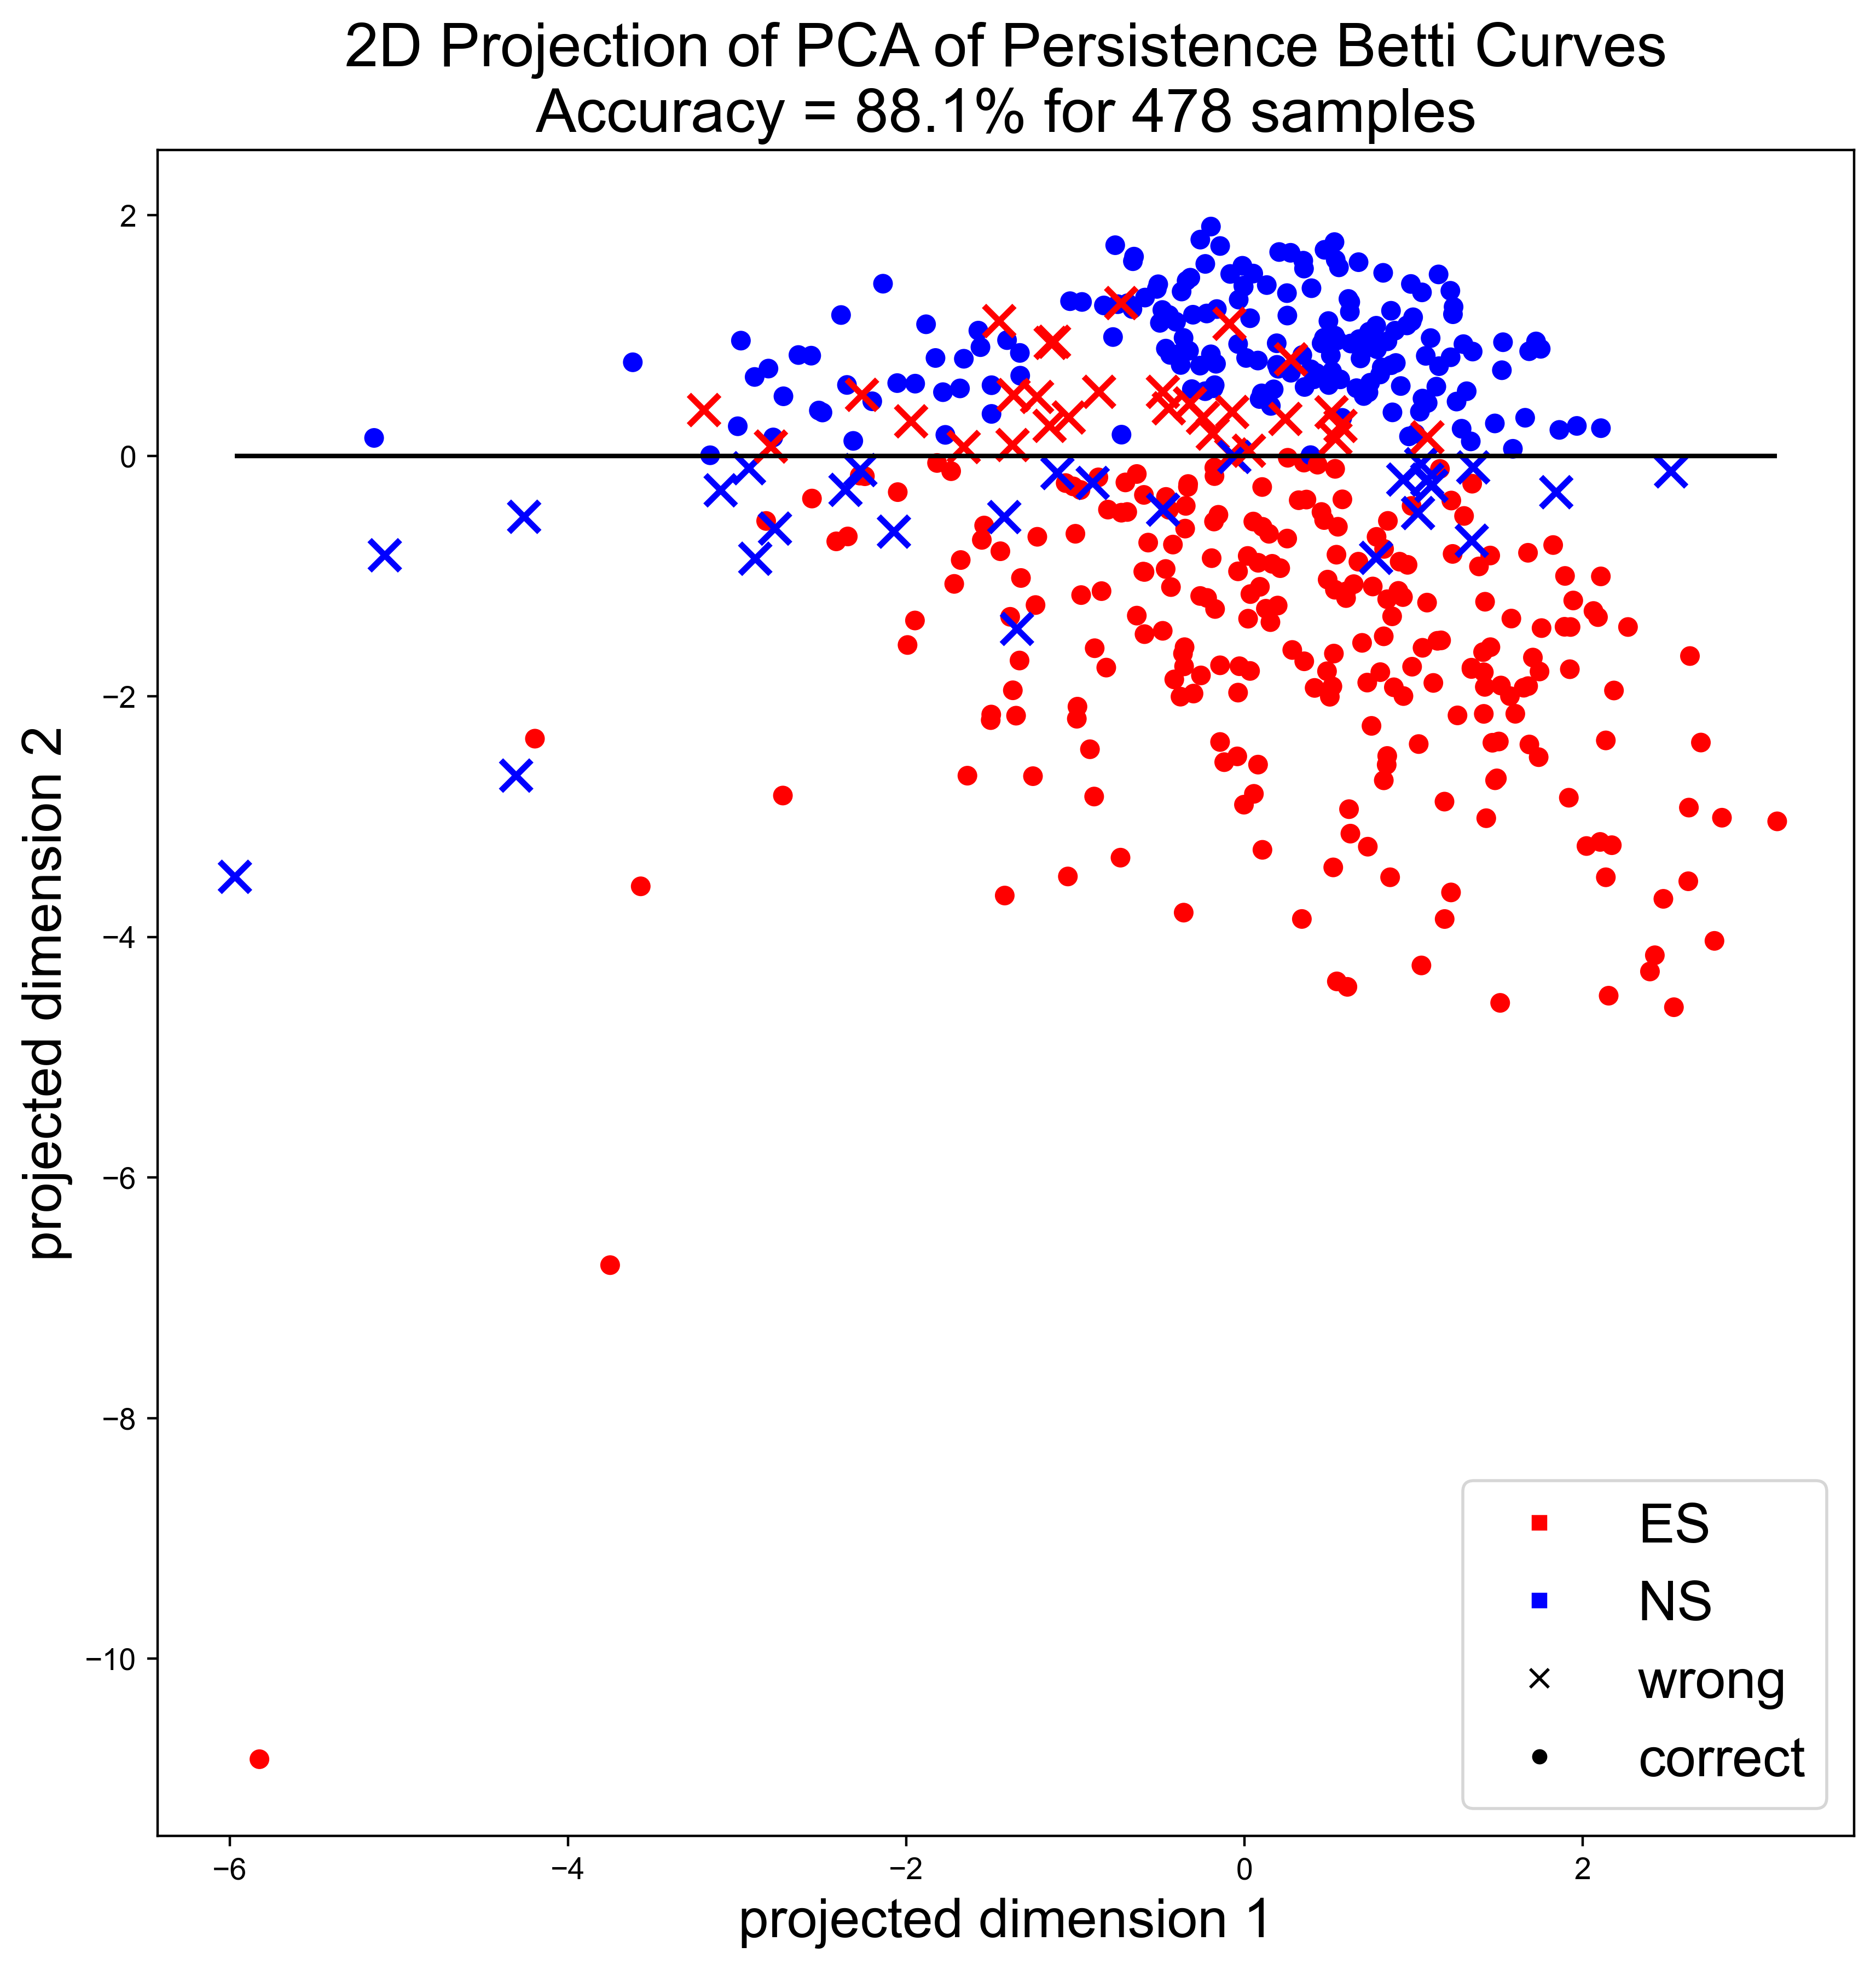

In [ ]:
import matplotlib.lines as mlines

plt.rcParams['font.family'] = 'Arial'

# Scatter plot in 2D
fig, ax = plt.subplots(figsize=(10,10), dpi=400)
ax.hlines(0, np.min(X_2D_rotated[:, 0]), np.max(X_2D_rotated[:, 0]), color='black')

ypredict = model.predict(X)
idx_right = ypredict == y
idx_wrong = ypredict != y

# ax.scatter(Xorg_2D_rotated[idx_right, 0], Xorg_2D_rotated[idx_right, 1]-y_unq,
#            c=y[idx_right],
#            cmap="coolwarm",
#            marker='.',
#            label="Correct Points")
# ax.scatter(Xorg_2D_rotated[idx_wrong, 0], Xorg_2D_rotated[idx_wrong, 1]-y_unq,
#            c=y[idx_wrong],
#            cmap="coolwarm",
#            marker='x',
#            label="Incorrect Points")

red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

idx_sort = np.argsort(Xorg_2D_rotated[:, 0])
Xplot = Xorg_2D_rotated[idx_sort, :]
yplot = y[idx_sort]
idx_right = idx_right[idx_sort]
idx_wrong = idx_wrong[idx_sort]

colors_right = [red if yx == 0 or yx == 'ES' else blue for yx in yplot[idx_right]]
colors_wrong = [red if yx == 0 or yx == 'ES' else blue for yx in yplot[idx_wrong]]

ax.scatter(Xplot[idx_right, 0], Xplot[idx_right, 1]-y_unq,
           c=colors_right,
           marker='.',
           s=120, #edgecolors='black', #alpha=0.8,
           label="Correct Points")
ax.scatter(Xplot[idx_wrong, 0], Xplot[idx_wrong, 1]-y_unq,
           c=colors_wrong,
           marker='x',
           s=100, #edgecolors='black',
           lw=2,
           label="Incorrect Points")

# we have two outliers; we remove them
# sortedxvals = np.sort(Xorg_2D_rotated[:, 0])
# lastx_incluster = sortedxvals[np.argmax(np.diff(sortedxvals))]

# idx_inside = np.where(Xorg_2D_rotated[:, 0] < lastx_incluster)[0]
# ax.set_xlim(sortedxvals[0]-0.5, lastx_incluster+0.5)
# ax.set_ylim(np.min(Xorg_2D_rotated[idx_inside, 1])-y_unq-0.1,
#             np.max(Xorg_2D_rotated[idx_inside, 1])-y_unq+0.1)

# Labels
plt.xlabel("projected dimension 1", fontsize=18)
plt.ylabel("projected dimension 2", fontsize=18)
plt.title("2D Projection of PCA of Persistence Betti Curves\nAccuracy = {:.1f}% for {:d} samples".format(np.mean(idx_right)*100, len(idx_right)),
          fontsize=20)
# Add two points to the legend

handles, labels = ax.get_legend_handles_labels()
colors = plt.cm.coolwarm([0,300])

# handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=red, markersize=6, label='ES'))
# handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=blue, markersize=6, label='NS'))

handles = [mlines.Line2D([], [], marker='s', color='w', markerfacecolor=red, markersize=6, label='ES'),
           mlines.Line2D([], [], marker='s', color='w', markerfacecolor=blue, markersize=6, label='NS'),
           mlines.Line2D([], [], marker='x', color='black', markersize=6, linestyle=None, lw=0, label='wrong'),
           mlines.Line2D([], [], marker='o', color='w', markerfacecolor='black', markersize=6, label='correct')
           ]
ax.legend(handles=handles, fontsize=18)

fig.savefig(figures_path / 'svm_hyperplane_alignment_sted_bc.pdf', dpi=400)
fig.savefig(figures_path / 'svm_hyperplane_alignment_sted_bc.png', dpi=400)

## Airyscan 

0.5289037857264302
0.8901098901098901


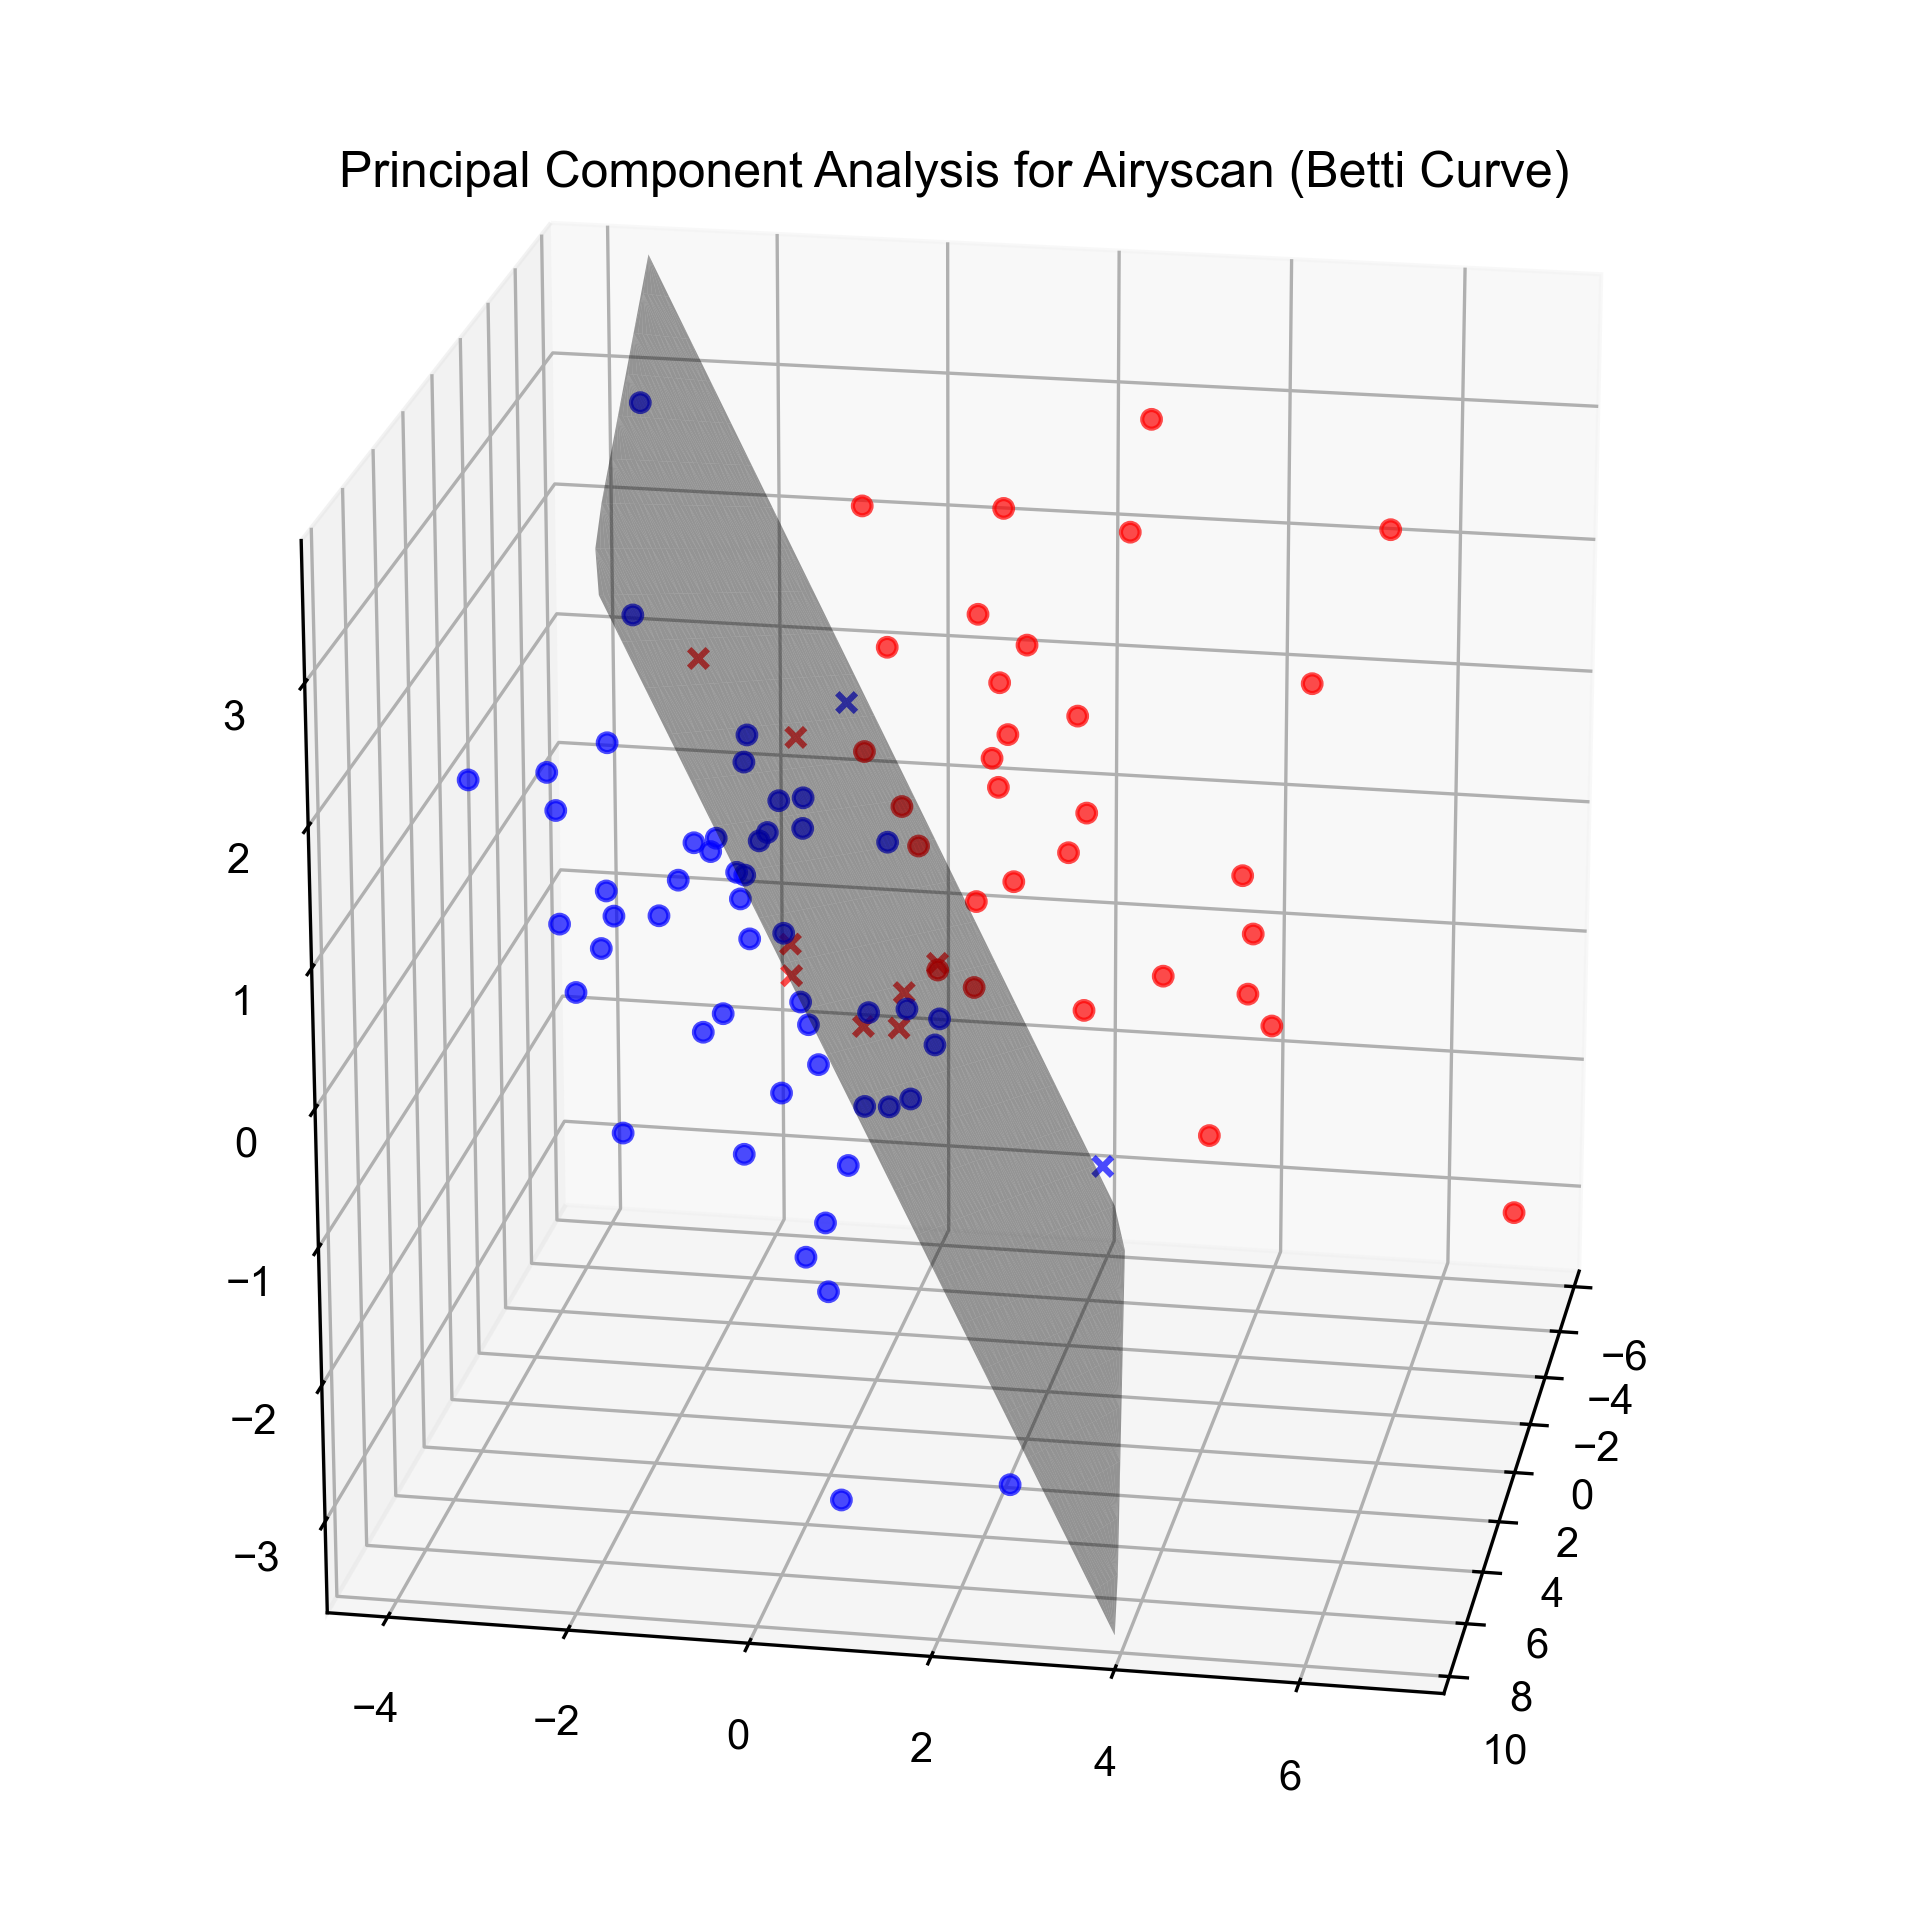

In [ ]:
df_tmp = pd.read_csv(Path(vectorization_airyscan, 'vectorizations_all_airyscan_clip_minmax_gaussian2c_minmax.csv'))
selection = [x for x in df_tmp.columns if 'labels' not in x and 'bc' in x and int(x.split('_')[2]) == 3]
Xt = df_tmp[selection].values
Xt = MinMaxScaler().fit_transform(Xt)
y = df_tmp['labels'].copy()

# Assume X and y are already defined
pca = PCA(n_components=3)
X = pca.fit_transform(Xt)

print(np.sum(pca.explained_variance_ratio_))

svm = SVC(kernel='linear')
svm.fit(X, y)
print(svm.score(X, y))

# Get the separating hyperplane
w = svm.coef_[0]
a = -w[0] / w[2]

xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = np.linspace(min(X[:, 1]), max(X[:, 1]))
YY, XX = np.meshgrid(yy, xx)
# YY, XX = np.meshgrid(np.unique(X[:,1]), np.unique(X[:,0]))

# Plot the separating hyperplane
if abs(w[2]) > 1e-10:
    ZZ = (-w[0] * XX - w[1] * YY - svm.intercept_[0]) / w[2]
else:
    ZZ = np.full_like(XX, np.mean(X[:, 2]))

# ax.plot_surface(XX, YY, ZZ, color='black', alpha=0.9)
mask = (ZZ >= np.min(X[:,2])) & (ZZ <= np.max(X[:,2]))
XX, YY, ZZ = XX[mask], YY[mask], ZZ[mask]

fig = plt.figure(figsize=(8, 8), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(XX.ravel(), YY.ravel(), ZZ.ravel(), color='black', alpha=0.4)

# plot the points
idx_right = np.where(svm.predict(X) == y)[0]
idx_wrong = np.where(svm.predict(X) != y)[0]

colors_right = np.array([red if yx == 0 or yx == 'ES' else blue for yx in y[idx_right]])
colors_wrong = np.array([red if yx == 0 or yx == 'ES' else blue for yx in y[idx_wrong]])

red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = np.array([red if yx == 0 or yx == 'ES' else blue for yx in y])

# Scatter plot with color based on y values
sc = ax.scatter(X[idx_right, 0], X[idx_right, 1], X[idx_right, 2], 
                c=colors_right, marker='o', alpha=0.7)
sc = ax.scatter(X[idx_wrong, 0], X[idx_wrong, 1], X[idx_wrong, 2], 
                c=colors_wrong, marker='x', alpha=0.7)

ax.set_box_aspect([1,1,1])
ax.margins(0)

# ax.azim = 1.87
ax.azim = 10
ax.elev = 20
ax.dist = 1

ax.set_title('Principal Component Analysis for Airyscan (Betti Curve)', y=0.98)# \nexplained variance = {:.2f}'.format(np.sum(pca.explained_variance_ratio_)))
fig.savefig(figures_path / 'svm_hyperplane_alignment_airyscan_bc_3d.pdf', dpi=300, bbox_inches='tight')

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Scatter plot of data points
fig.add_trace(go.Scatter3d(
    x=X[idx_right, 0],
    y=X[idx_right, 1],
    z=X[idx_right, 2],
    mode='markers',
    marker=dict(color=colors[idx_right], size=5),
    showlegend=True
))
fig.add_trace(go.Scatter3d(
    x=X[idx_wrong, 0],
    y=X[idx_wrong, 1],
    z=X[idx_wrong, 2],
    mode='markers',
    marker=dict(color=colors[idx_wrong], size=3, symbol='x')
))
fig.update_layout(
    width=1000,  # Increase width
    height=800,  # Increase height
)

# Generate hyperplane grid
xx = np.linspace(min(X[:, 0]), max(X[:, 0]), 20)
yy = np.linspace(min(X[:, 1]), max(X[:, 1]), 20)
YY, XX = np.meshgrid(yy, xx)

if abs(w[2]) > 1e-6:
    ZZ = (-w[0] * XX - w[1] * YY - svm.intercept_[0]) / w[2]
else:
    ZZ = np.full_like(XX, np.mean(X[:, 2]))

# Add hyperplane as a surface
fig.add_trace(go.Surface(x=XX, y=YY, z=ZZ, colorscale='Greys', opacity=0.5, showscale=False))

# Update layout for interactivity
fig.update_layout(
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    ),
    # title="Interactive 3D SVM Hyperplane",
    showlegend=False,
    scene_camera=dict(
        eye=dict(x=-1.87, y=-0.88, z=-0.64)
    )
)
# Extract camera settings from a Plotly figure
camera = fig.layout.scene.camera

azim = camera.eye.x  # Azimuth-like value
elev = camera.eye.y  # Elevation-like value
dist = camera.eye.z  # Distance from the plot

print(f"Azimuth: {azim}, Elevation: {elev}, Distance: {dist}")

fig.show()

Azimuth: -1.87, Elevation: -0.88, Distance: -0.64


0.5289037857324825


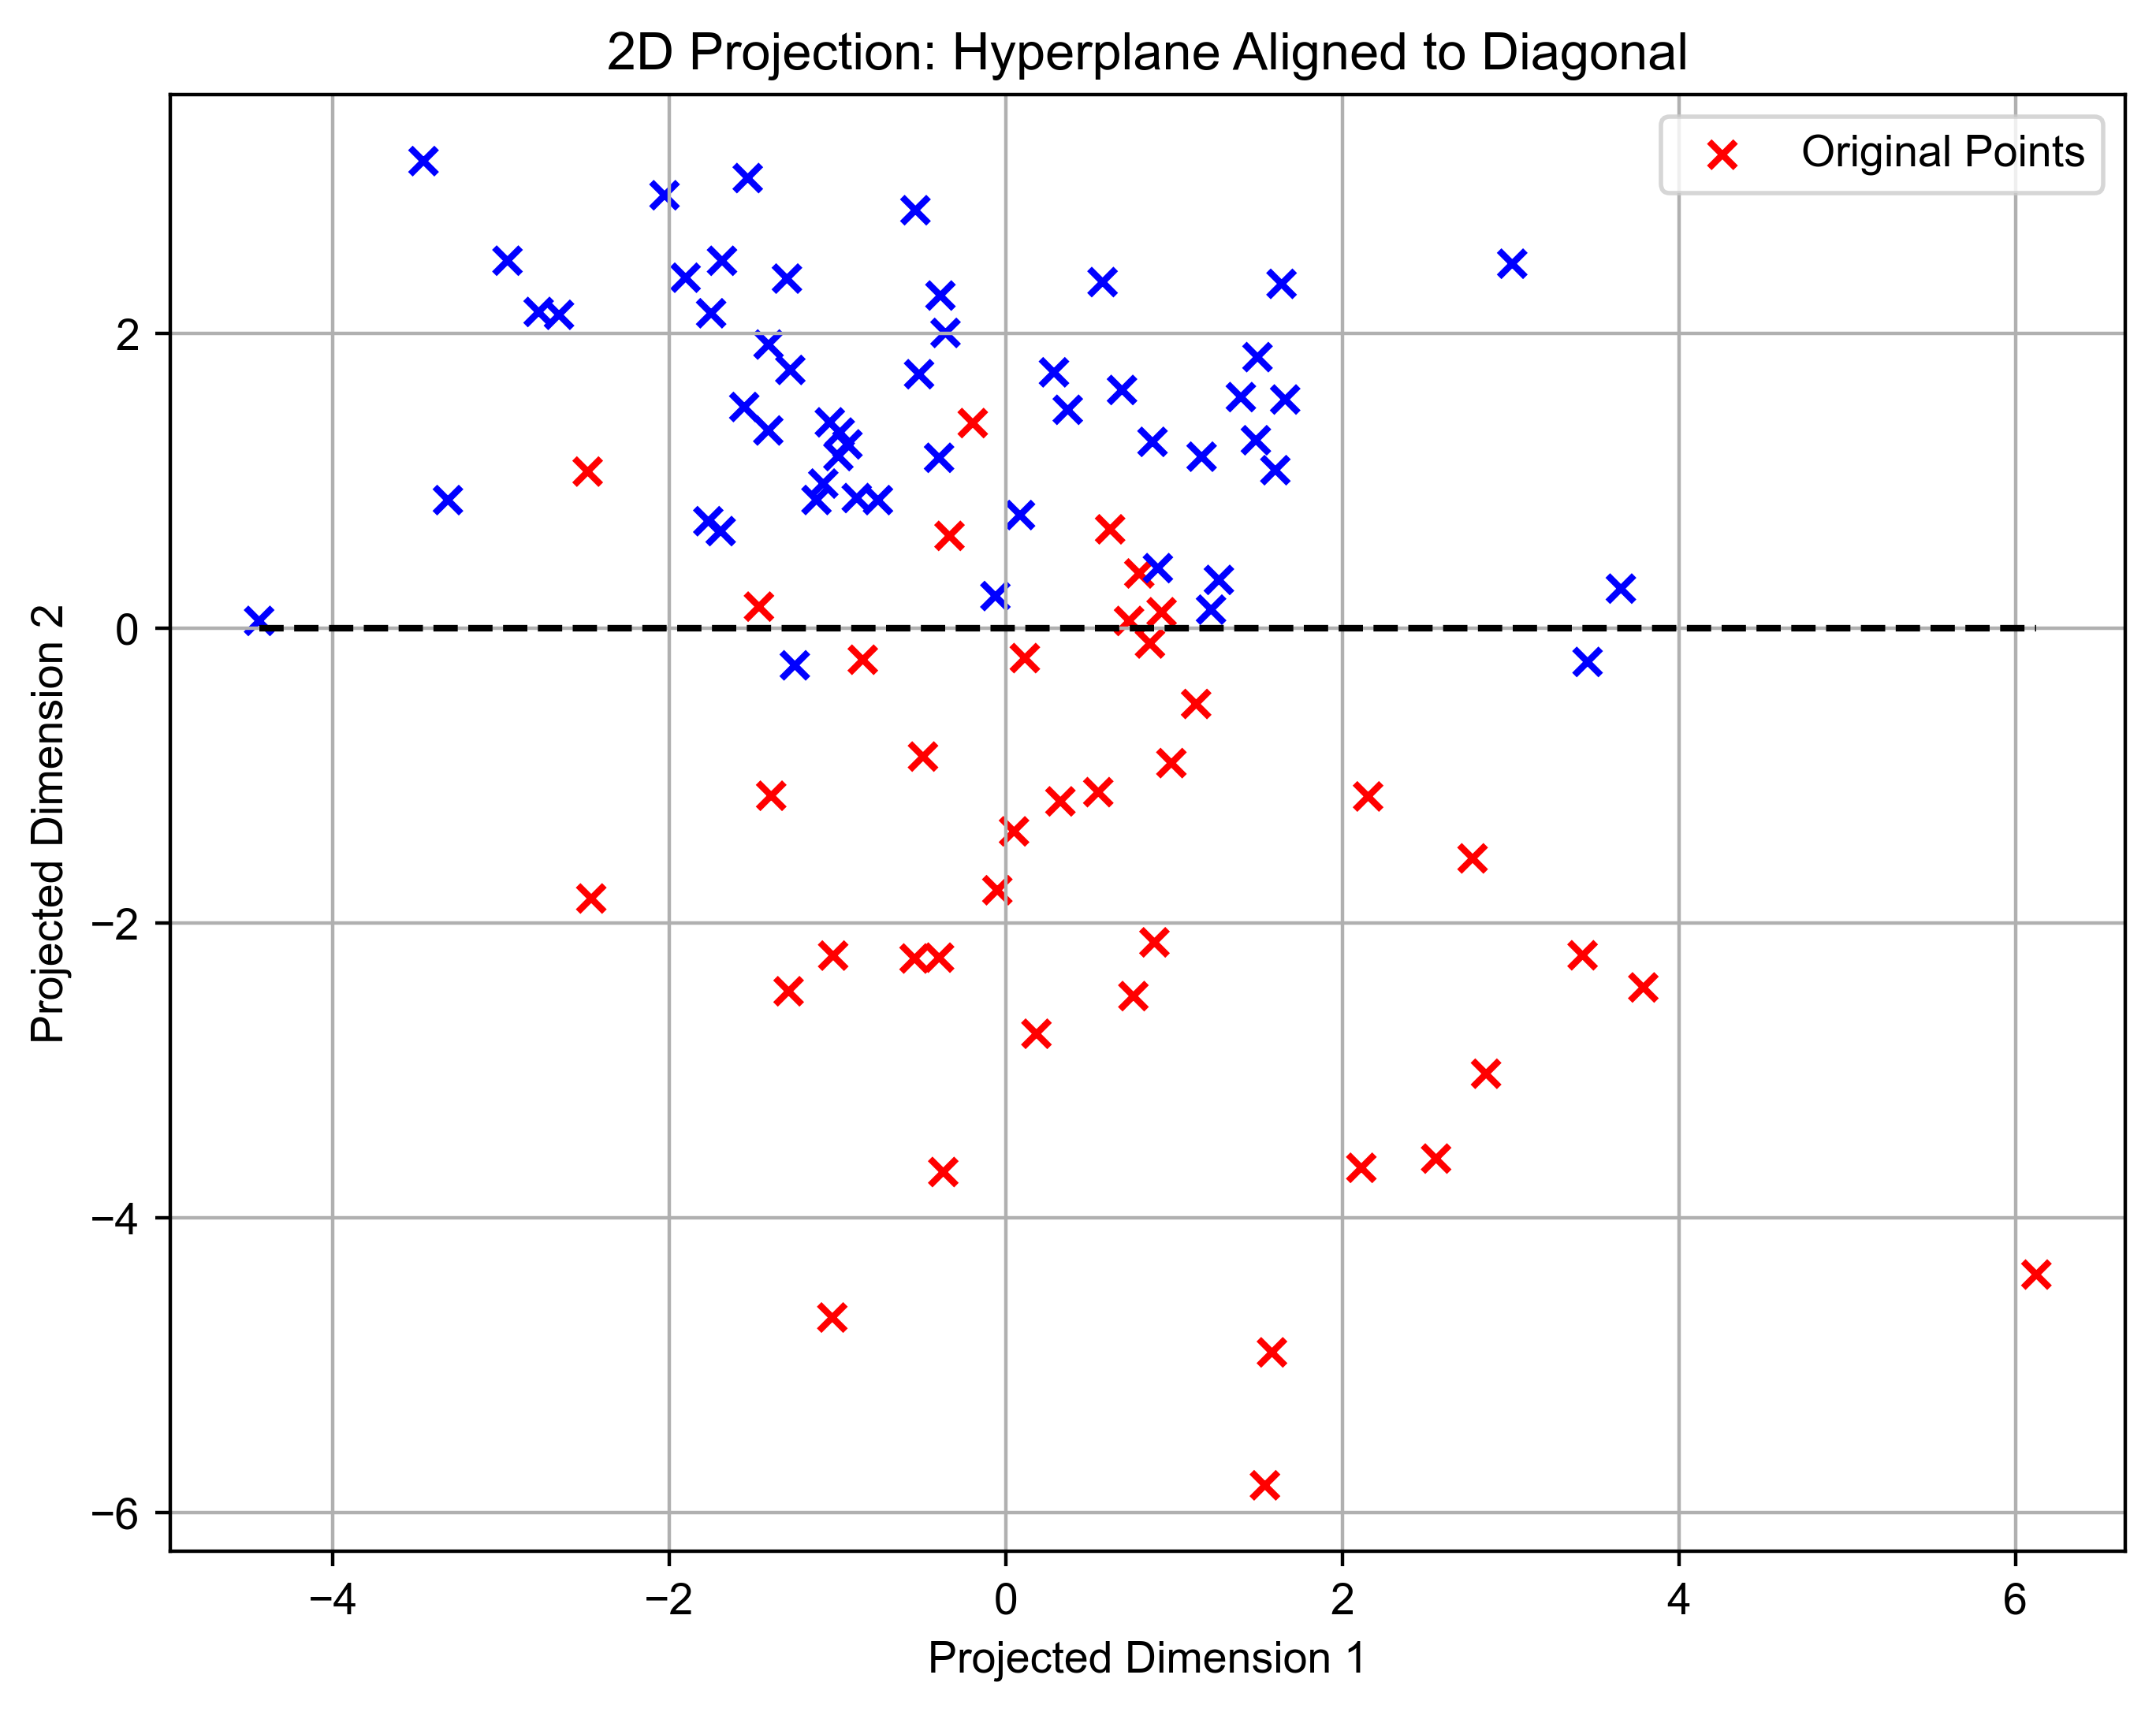

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm

df_tmp = pd.read_csv(Path(vectorization_airyscan, 'vectorizations_all_airyscan_clip_minmax_gaussian2c_minmax.csv'))
selection = [x for x in df_tmp.columns if 'labels' not in x and 'bc' in x and int(x.split('_')[2]) == 3]
Xt = df_tmp[selection].values
Xt = MinMaxScaler().fit_transform(Xt)
y = df_tmp['labels'].copy()

# Assume X and y are already defined
pca = PCA(n_components=3)
X = pca.fit_transform(Xt)

varexplained = np.sum(pca.explained_variance_ratio_)
print(varexplained)

# Train SVM with a linear kernel
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

# Extract hyperplane parameters
w = clf.coef_[0]  # Normal vector to the hyperplane
b = clf.intercept_[0]

# Compute two orthonormal basis vectors that span the hyperplane
w_norm = w / np.linalg.norm(w)  # Normalize w
U, _, _ = np.linalg.svd(np.eye(3) - np.outer(w_norm, w_norm))  # Find orthonormal basis
basis_1, basis_2 = U[:, 1], U[:, 2]  # Two vectors spanning the hyperplane

# Project points onto the hyperplane
distances = (X @ w + b) / np.linalg.norm(w)  # Signed distances
X_hyper = X - np.outer(distances, w_norm)  # Projected points

# Transform hyperplane points into 2D
X_2D = np.column_stack([X_hyper @ basis_1, X_hyper @ basis_2])
Xorg_2D = np.column_stack([X @ basis_1, X @ basis_2])

# Rotate to align with the diagonal (45-degree rotation)
theta = np.pi
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
X_2D_rotated = X_2D @ rotation_matrix
Xorg_2D_rotated = Xorg_2D @ rotation_matrix

y_unq = np.unique(X_2D_rotated[:,1])
assert np.all(np.diff(y_unq) < 1e-14)
y_unq = np.mean(y_unq)


red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

# Scatter plot in 2D
plt.figure(figsize=(8, 6), dpi=400)
plt.hlines(0, np.min(Xorg_2D_rotated[:, 0]), np.max(Xorg_2D_rotated[:, 0]), color='black', linestyle='--')
plt.scatter(Xorg_2D_rotated[:, 0], Xorg_2D_rotated[:, 1]-y_unq,
            color=colors, marker='x', label="Original Points")

# Labels
plt.xlabel("Projected Dimension 1")
plt.ylabel("Projected Dimension 2")
plt.title("2D Projection: Hyperplane Aligned to Diagonal")
plt.legend()
plt.grid()

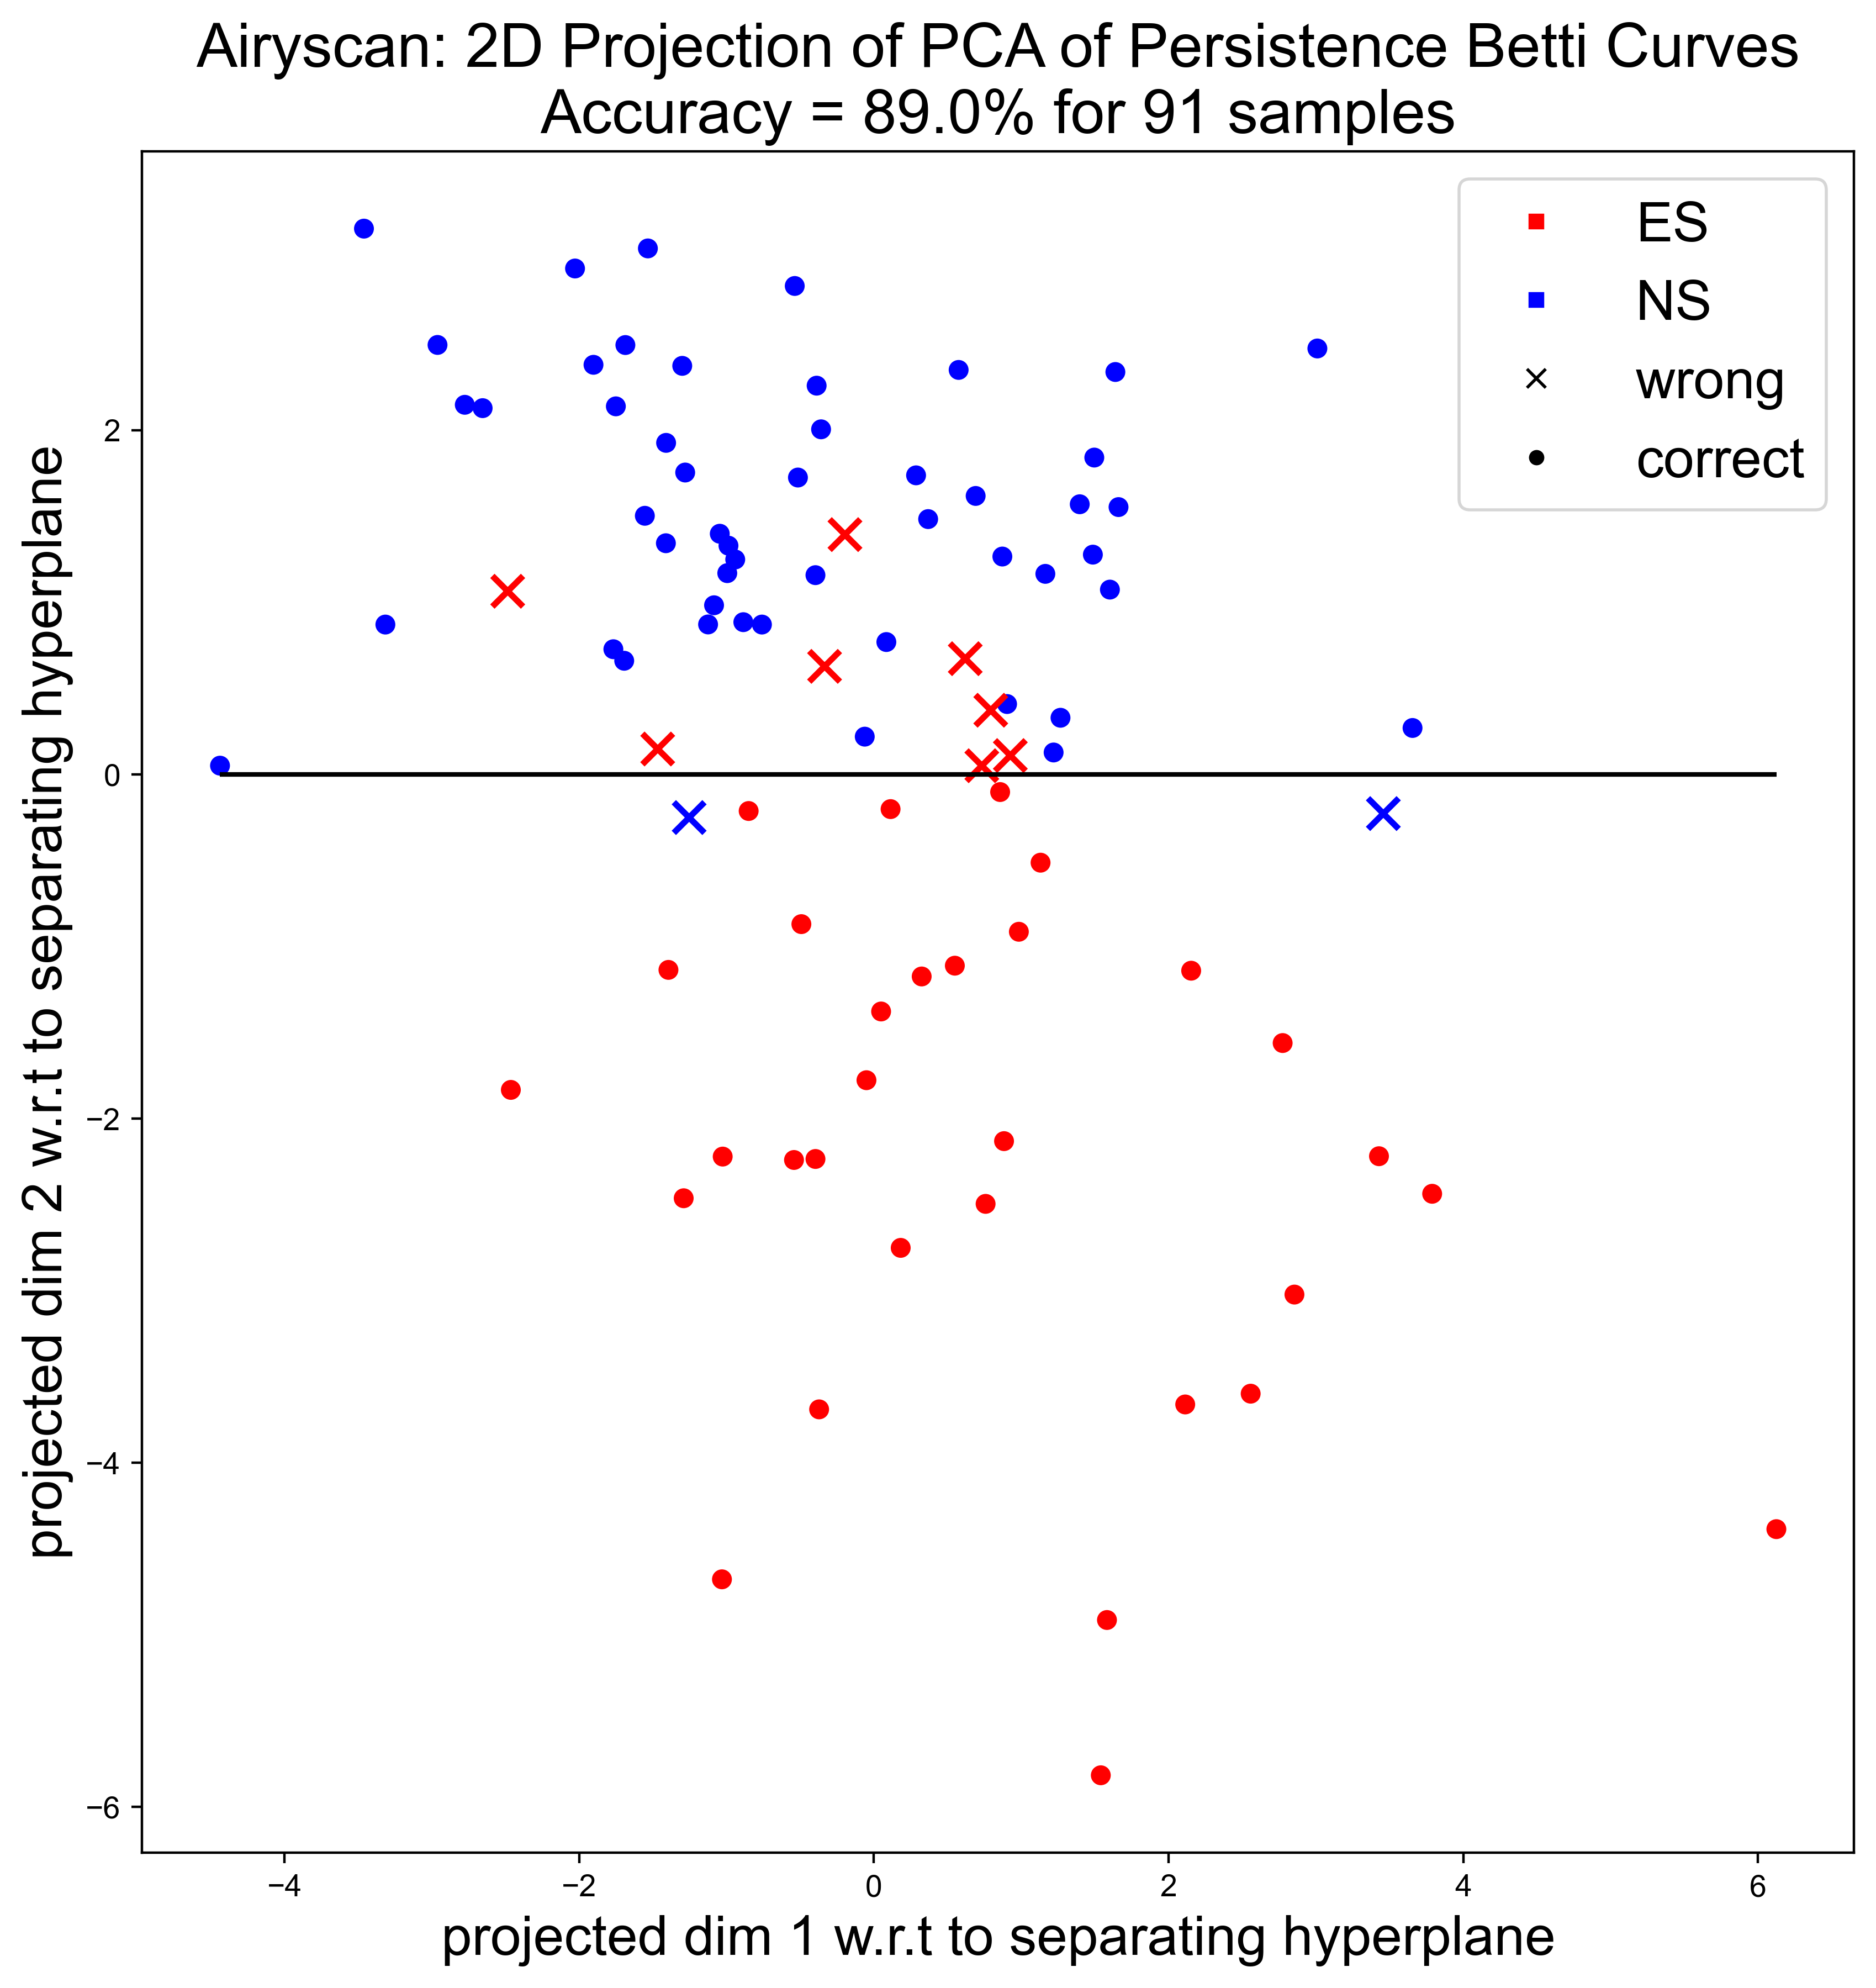

In [ ]:
import matplotlib.lines as mlines

plt.rcParams['font.family'] = 'Arial'

# Scatter plot in 2D
fig, ax = plt.subplots(figsize=(10,10), dpi=400)
ax.hlines(0, np.min(X_2D_rotated[:, 0]), np.max(X_2D_rotated[:, 0]), color='black')

ypredict = model.predict(X)
idx_right = ypredict == y
idx_wrong = ypredict != y

# ax.scatter(Xorg_2D_rotated[idx_right, 0], Xorg_2D_rotated[idx_right, 1]-y_unq,
#            c=y[idx_right],
#            cmap="coolwarm",
#            marker='.',
#            label="Correct Points")
# ax.scatter(Xorg_2D_rotated[idx_wrong, 0], Xorg_2D_rotated[idx_wrong, 1]-y_unq,
#            c=y[idx_wrong],
#            cmap="coolwarm",
#            marker='x',
#            label="Incorrect Points")

red = (1.0, 0.0, 0.0)
blue = (0.0, 0.0, 1.0)
colors = [red if yx == 0 or yx == 'ES' else blue for yx in y]

idx_sort = np.argsort(Xorg_2D_rotated[:, 0])
Xplot = Xorg_2D_rotated[idx_sort, :]
yplot = y[idx_sort]
idx_right = idx_right[idx_sort]
idx_wrong = idx_wrong[idx_sort]

colors_right = [red if yx == 0 or yx == 'ES' else blue for yx in yplot[idx_right]]
colors_wrong = [red if yx == 0 or yx == 'ES' else blue for yx in yplot[idx_wrong]]

ax.scatter(Xplot[idx_right, 0], Xplot[idx_right, 1]-y_unq,
           c=colors_right,
           marker='.',
           s=120, #edgecolors='black', #alpha=0.8,
           label="Correct Points")
ax.scatter(Xplot[idx_wrong, 0], Xplot[idx_wrong, 1]-y_unq,
           c=colors_wrong,
           marker='x',
           s=100, #edgecolors='black',
           lw=2,
           label="Incorrect Points")

# we have two outliers; we remove them
# sortedxvals = np.sort(Xorg_2D_rotated[:, 0])
# lastx_incluster = sortedxvals[np.argmax(np.diff(sortedxvals))]

# idx_inside = np.where(Xorg_2D_rotated[:, 0] < lastx_incluster)[0]
# ax.set_xlim(sortedxvals[0]-0.5, lastx_incluster+0.5)
# ax.set_ylim(np.min(Xorg_2D_rotated[idx_inside, 1])-y_unq-0.1,
#             np.max(Xorg_2D_rotated[idx_inside, 1])-y_unq+0.1)

# Labels
plt.xlabel("projected dim 1 w.r.t to separating hyperplane", fontsize=18)
plt.ylabel("projected dim 2 w.r.t to separating hyperplane", fontsize=18)
plt.title("Airyscan: 2D Projection of PCA of Persistence Betti Curves\nAccuracy = {:.1f}% for {:d} samples".format(np.mean(idx_right)*100, len(idx_right)),
          fontsize=20)
# Add two points to the legend

handles, labels = ax.get_legend_handles_labels()
colors = plt.cm.coolwarm([0,300])

# handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=red, markersize=6, label='ES'))
# handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=blue, markersize=6, label='NS'))

handles = [mlines.Line2D([], [], marker='s', color='w', markerfacecolor=red, markersize=6, label='ES'),
           mlines.Line2D([], [], marker='s', color='w', markerfacecolor=blue, markersize=6, label='NS'),
           mlines.Line2D([], [], marker='x', color='black', markersize=6, linestyle=None, lw=0, label='wrong'),
           mlines.Line2D([], [], marker='o', color='w', markerfacecolor='black', markersize=6, label='correct')
           ]
ax.legend(handles=handles, fontsize=18)

fig.savefig(figures_path / 'svm_hyperplane_alignment_airyscan_bc.pdf', dpi=400, bbox_inches='tight')
fig.savefig(figures_path / 'svm_hyperplane_alignment_airyscan_bc.png', dpi=400)